<img src=https://upload.wikimedia.org/wikipedia/commons/9/98/The_Simpsons_yellow_logo.svg width="500">

### The Simpsons are perhaps America's most well known TV family, and certainly the longest running sitcom. Set in the fictional town of Springfield, the Simpsons have satirized American life and have greatly impacted many other adult-oriented sitcoms. This projects aims to capture trends over the years, as well as how side character popularity fluctuates.

### All data was obtained through The Simpsons Dataset by Prashant Banerjee on Kaggle: 
https://www.kaggle.com/datasets/prashant111/the-simpsons-dataset?select=simpsons_episodes.csv



# Data Exploration and Visualization - Nathan Cheou

### The dataset is split into four CSVs containing data on characters, episodes, locations, and transcripts. We'll be looking at what insights we can extract on each set. We'll start with episodes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [2]:
episodes = pd.read_csv('simpsons_episodes.csv')

Here we can see that the episodes set contains info such as episode ID, air dates, IMDB ratings, IMDB votes, and number of viewers.

In [3]:
episodes.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


We'll start off by sorting the dataframe by episode id, then dropping any columns we can't really use.

In [4]:
episodes = episodes.sort_values('id').reset_index(drop = True)

In [5]:
episodes.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,1,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,3734.0,1,1,1989-12-17,1989,7G08,1,Simpsons Roasting on an Open Fire,26.7,http://www.simpsonsworld.com/video/273376835817,171408.0
1,2,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1973.0,2,2,1990-01-14,1990,7G02,1,Bart the Genius,24.5,http://www.simpsonsworld.com/video/283744835990,91423.0
2,3,http://static-media.fxx.com/img/FX_Networks_-_...,7.5,1709.0,3,3,1990-01-21,1990,7G03,1,Homer's Odyssey,27.5,http://www.simpsonsworld.com/video/273381443699,78072.0
3,4,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1701.0,4,4,1990-01-28,1990,7G04,1,There's No Disgrace Like Home,20.2,http://www.simpsonsworld.com/video/273392195780,67378.0
4,5,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1732.0,5,5,1990-02-04,1990,7G05,1,Bart the General,27.1,http://www.simpsonsworld.com/video/300934723994,63129.0


In [6]:
episodes.drop(['image_url', 'video_url'], axis = 1, inplace = True)

In [7]:
episodes = episodes.set_index('id', drop = True)

In [8]:
episodes.head()

,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,views
id,,,,,,,,,,,
1,8.2,3734.0,1,1,1989-12-17,1989,7G08,1,Simpsons Roasting on an Open Fire,26.7,171408.0
2,7.8,1973.0,2,2,1990-01-14,1990,7G02,1,Bart the Genius,24.5,91423.0
3,7.5,1709.0,3,3,1990-01-21,1990,7G03,1,Homer's Odyssey,27.5,78072.0
4,7.8,1701.0,4,4,1990-01-28,1990,7G04,1,There's No Disgrace Like Home,20.2,67378.0
5,8.1,1732.0,5,5,1990-02-04,1990,7G05,1,Bart the General,27.1,63129.0


We can see we have a few rows with missing data in them. We'll visualize the missing data in a barplot using the msno package.

In [9]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 600
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   imdb_rating             597 non-null    float64
 1   imdb_votes              597 non-null    float64
 2   number_in_season        600 non-null    int64  
 3   number_in_series        600 non-null    int64  
 4   original_air_date       600 non-null    object 
 5   original_air_year       600 non-null    int64  
 6   production_code         600 non-null    object 
 7   season                  600 non-null    int64  
 8   title                   600 non-null    object 
 9   us_viewers_in_millions  594 non-null    float64
 10  views                   596 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 56.2+ KB


<AxesSubplot:>

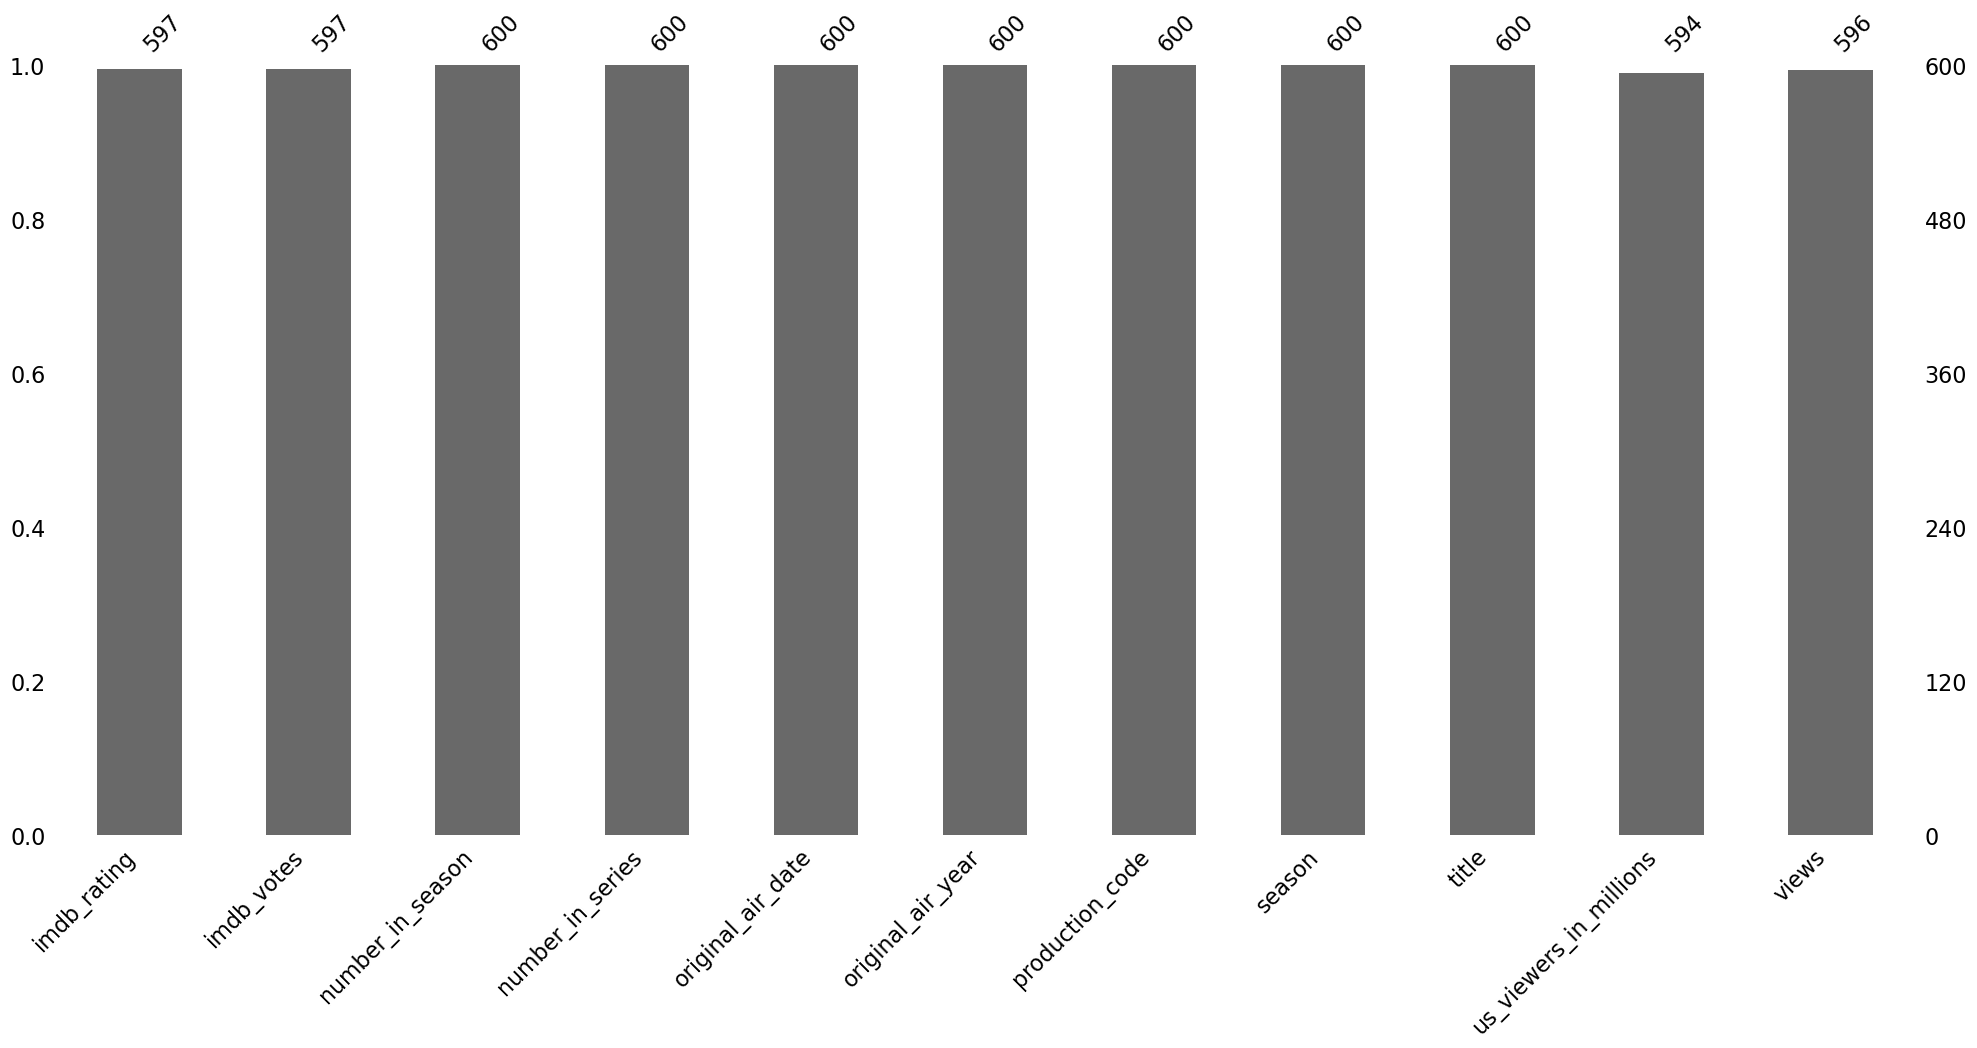

In [10]:
msno.bar(episodes)

The first visualization we'll make is seeing how IMDB ratings change over time.

In [11]:
episode_ratings = episodes.groupby(by = 'season')['imdb_rating'].mean().to_frame()

In [12]:
episode_ratings

,imdb_rating
season,
1,7.807692
2,8.040909
3,8.154167
4,8.268182
5,8.336364
6,8.312000
7,8.324000
8,8.220000
9,7.844000


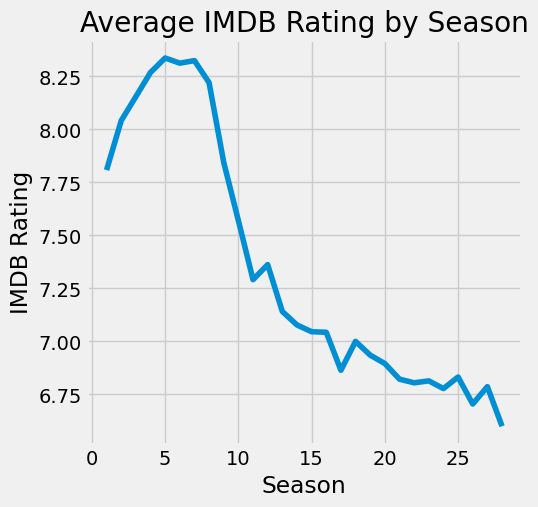

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (5,5))
ax = sns.lineplot(x = 'season', y = 'imdb_rating', data = episode_ratings)
ax.set_ylabel('IMDB Rating')
ax.set_xlabel('Season')
plt.title('Average IMDB Rating by Season')
plt.show()

The Simpsons hit a peak in seasons 5-8 and have steadily declined since. Let's find out what the highest rated episode is! 

Looks like the highest rated episode is You Only Move Twice, which is one of my favorites as well.

In [14]:
episodes.iloc[episodes['imdb_rating'].argmax()]

imdb_rating                               9.2
imdb_votes                             2439.0
number_in_season                            2
number_in_series                          155
original_air_date                  1996-11-03
original_air_year                        1996
production_code                          3F23
season                                      8
title                     You Only Move Twice
us_viewers_in_millions                   13.9
views                                 79609.0
Name: 155, dtype: object

Now let's take a look at Simpsons viewership. We notice that there's a sudden spike around season 12 of the show! We might be curious as to why this is the case. 

## Did the Simpsons movie release cause a spike in popularity? 
No, the movie came out in 2007 and season 12 aired in 1989, nearly 20 years before it released. 

## Unfortunately the dataset does not capture the fact that viewership for seasons 1-11 was counted by number of households, and from season 12 onwards they counted actual individual viewers. A friendly reminder that having some domain knowledge will enhance your analysis.
This means that viewership declined even more steeply than what this graph might imply.

In [15]:
episode_views = episodes.groupby(by = 'season')['us_viewers_in_millions'].mean().to_frame()
episode_views

,us_viewers_in_millions
season,
1,27.807692
2,24.404545
3,21.766667
4,22.395455
5,18.940909
6,15.596000
7,14.660000
8,14.600000
9,10.008000


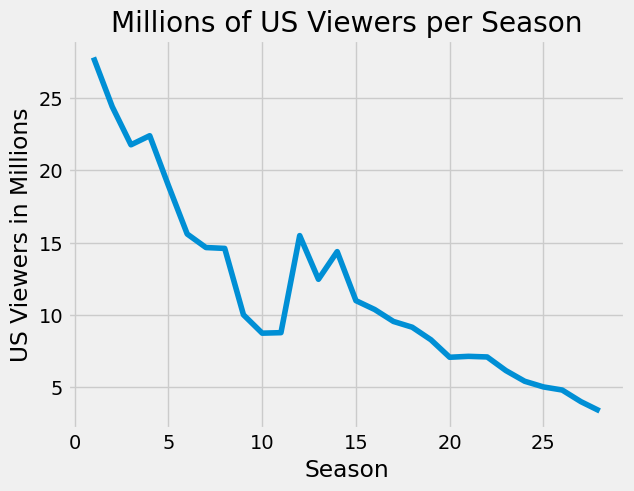

In [16]:
sns.lineplot(x = 'season', y = 'us_viewers_in_millions', data = episode_views)
plt.title('Millions of US Viewers per Season')
plt.xlabel('Season')
plt.ylabel('US Viewers in Millions')
plt.show()

We'll rename the number_in_series column to episode_id, so we can match it up with the episode_ids in the transcript dataset, which we'll call lines.

In [17]:
episodes = episodes.rename(columns = {'number_in_series':'episode_id'})

In [18]:
lines = pd.read_csv('simpsons_script_lines.csv', dtype = 'unicode')

We can see the lines dataframe contains info such as episode ids, a normalized text column, where the line was said, who said it, and the word count. We also have quite a few more missing rows than we did in the episode data frame

In [19]:
lines.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,true,40,3,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [20]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158271 entries, 0 to 158270
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  158271 non-null  object
 1   episode_id          158271 non-null  object
 2   number              158271 non-null  object
 3   raw_text            158271 non-null  object
 4   timestamp_in_ms     158271 non-null  object
 5   speaking_line       158271 non-null  object
 6   character_id        140750 non-null  object
 7   location_id         157864 non-null  object
 8   raw_character_text  140749 non-null  object
 9   raw_location_text   157863 non-null  object
 10  spoken_words        132112 non-null  object
 11  normalized_text     132087 non-null  object
 12  word_count          132112 non-null  object
dtypes: object(13)
memory usage: 15.7+ MB


<AxesSubplot:>

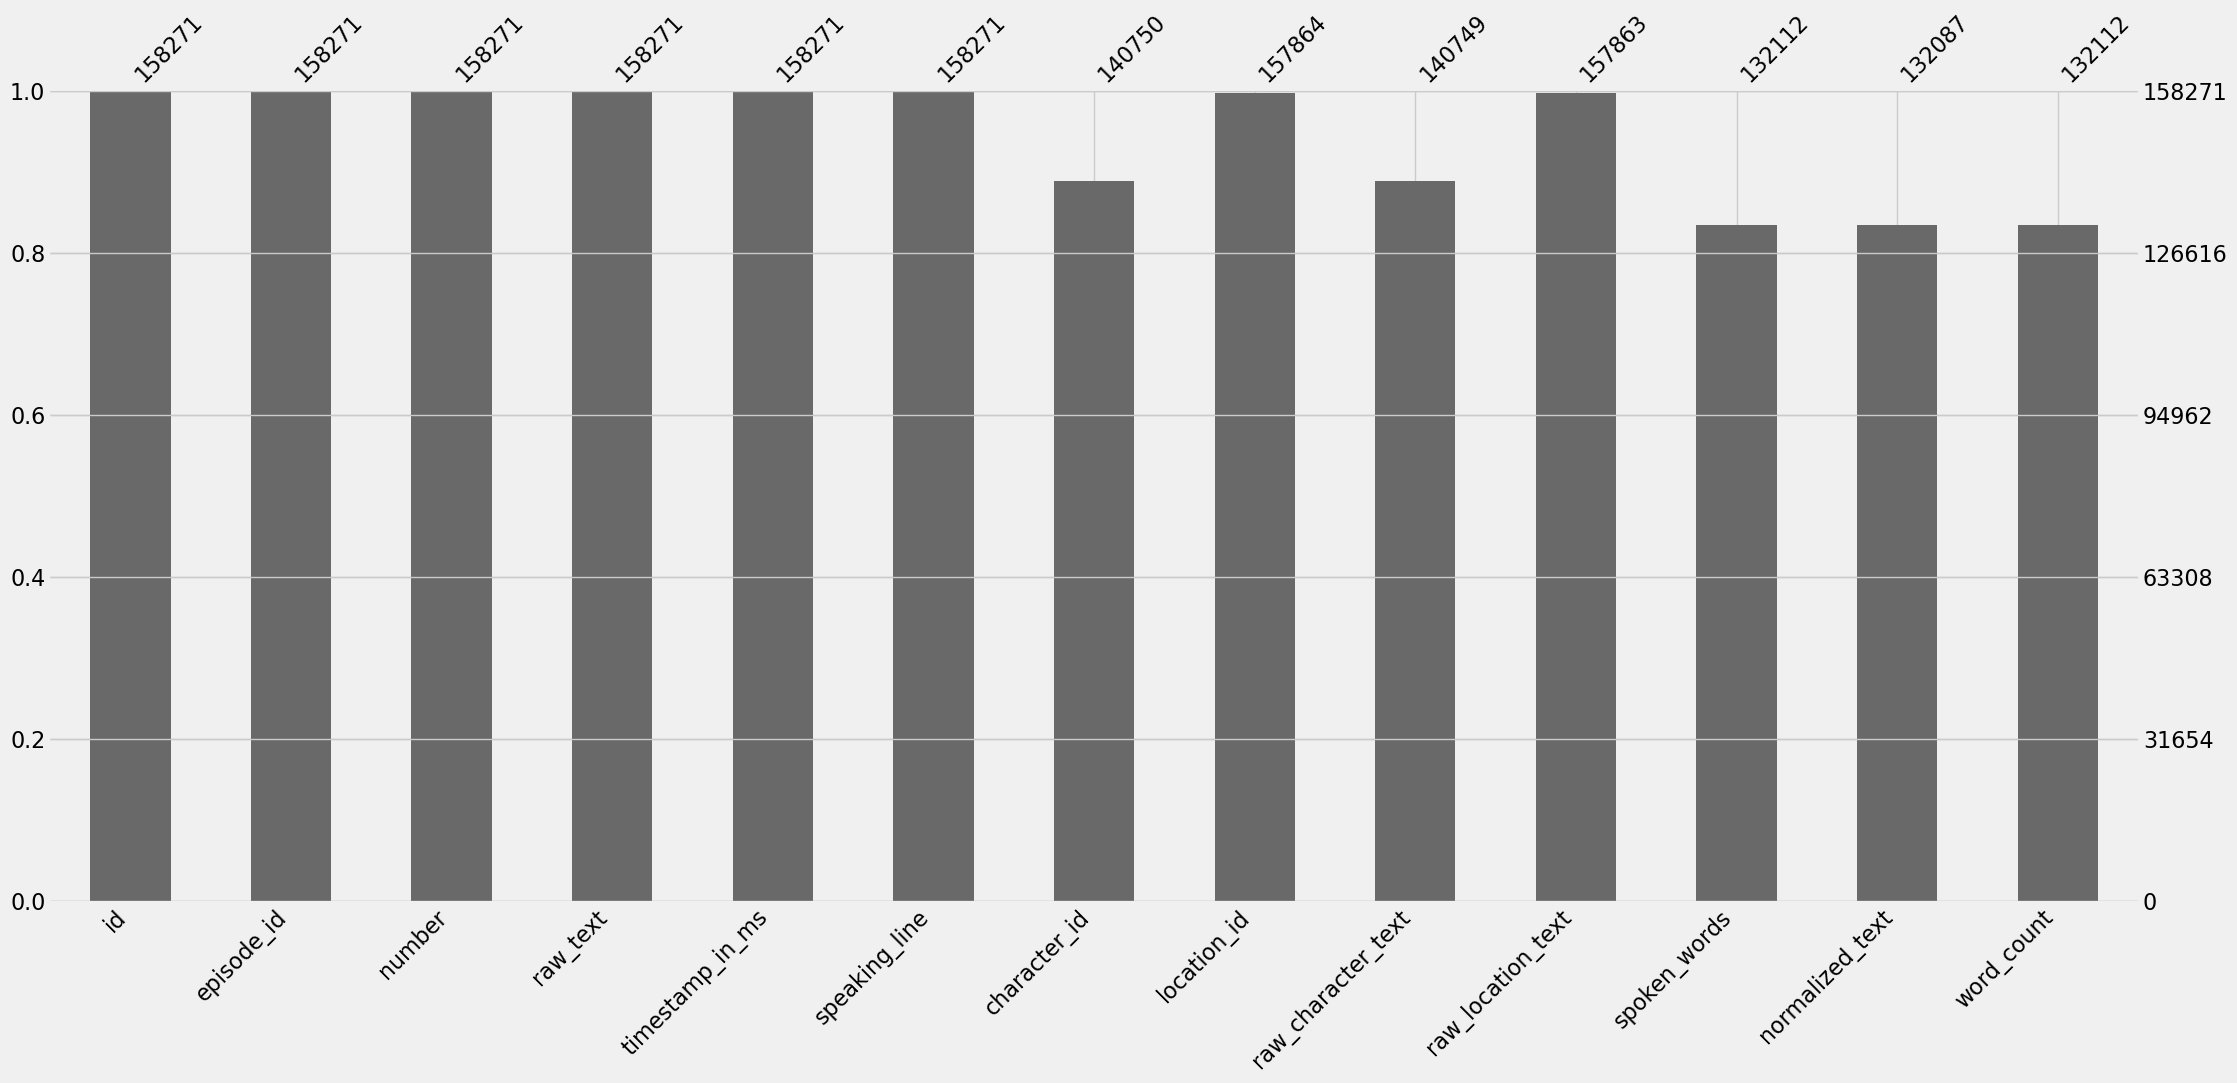

In [21]:
msno.bar(lines)

We can see that there are some non-speaking lines. I want to analyze spoken voicelines by characters, so I'll be removing any non-speaking lines. Already the msno graph looks a lot better!

In [22]:
lines = lines[lines['speaking_line'] == 'true']

<AxesSubplot:>

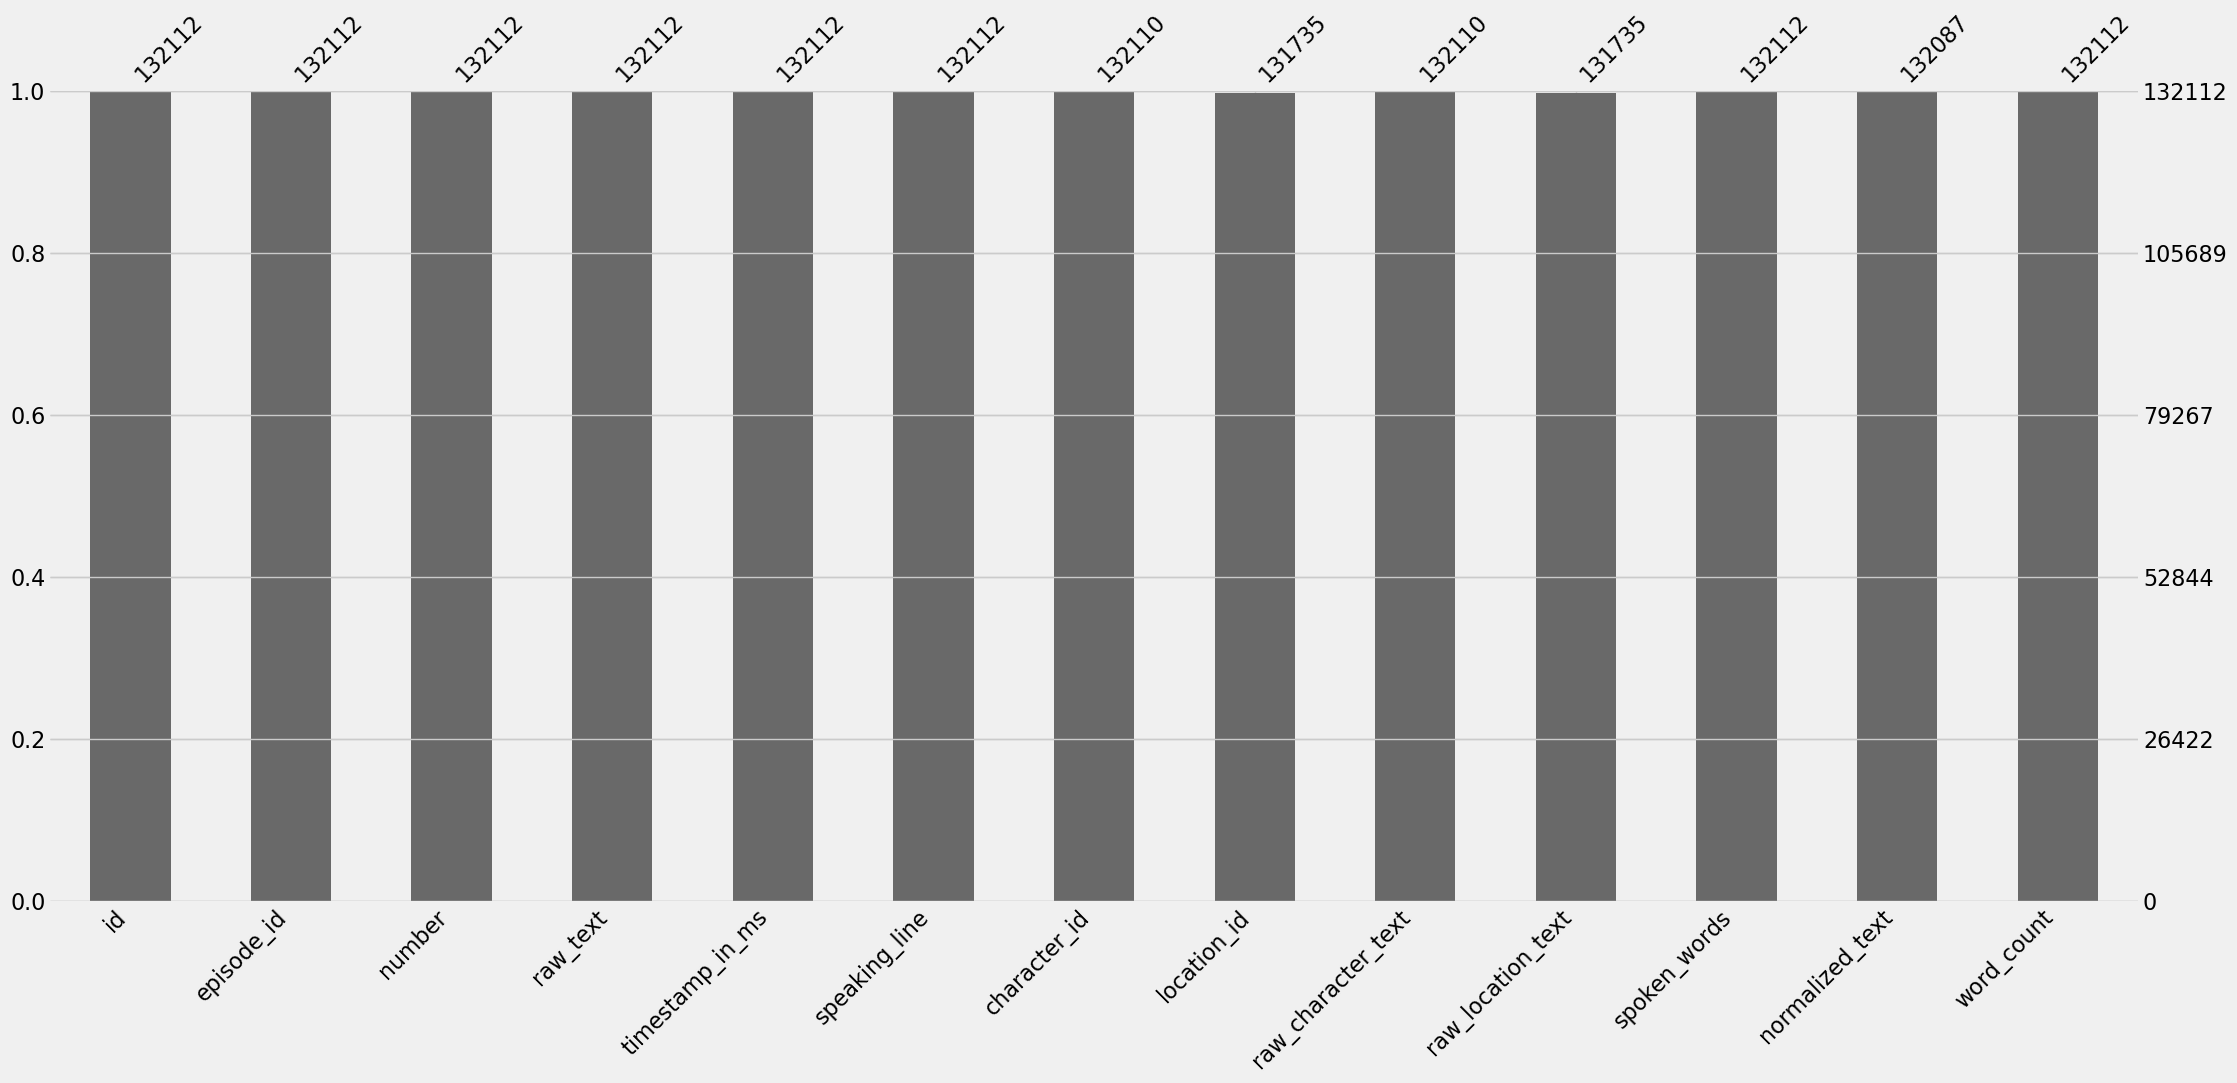

In [23]:
msno.bar(lines)

We saw earlier that all of the data types are objects, so we'll change a few of them to numeric types to make it easier to sort!

In [24]:
lines.id = lines.id.astype('int64')
lines.episode_id = lines.episode_id.astype('int64')
lines.number = lines.number.astype('int64')
lines.location_id = lines.location_id.astype('float')

In [25]:
#Seeing what our new dataset looks like
lines[lines['episode_id'] == 2].sort_values(by = 'number')

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
149145,379,2,1,"Bart Simpson: Come on, Mom.",101000,true,8,25.0,Bart Simpson,Simpson Living Room,"Come on, Mom.",come on mom,3
149146,380,2,2,"Lisa Simpson: Yeah, Mom, hurry up.",102000,true,9,25.0,Lisa Simpson,Simpson Living Room,"Yeah, Mom, hurry up.",yeah mom hurry up,4
149147,381,2,3,Marge Simpson: All right... hmmm... How about ...,105000,true,1,25.0,Marge Simpson,Simpson Living Room,"All right... hmmm... How about ""he""?",all right hmmm how about he,6
149148,382,2,4,"Marge Simpson: Two points. Your turn, dear.",109000,true,1,25.0,Marge Simpson,Simpson Living Room,"Two points. Your turn, dear.",two points your turn dear,5
149150,383,2,5,Homer Simpson: (TO HIMSELF) Hmmmm. How could a...,112000,true,2,25.0,Homer Simpson,Simpson Living Room,Hmmmm. How could anyone make a word out of the...,hmmmm how could anyone make a word out of thes...,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149433,666,2,288,Bart Simpson: I can try.,1314000,true,8,5.0,Bart Simpson,Simpson Home,I can try.,i can try,3
149434,667,2,289,Homer Simpson: March your butt right out here....,1315000,true,2,5.0,Homer Simpson,Simpson Home,March your butt right out here. Now!,march your butt right out here now,7
149435,668,2,290,"Bart Simpson: No way, man!",1317000,true,8,5.0,Bart Simpson,Simpson Home,"No way, man!",no way man,3
149436,669,2,291,"Homer Simpson: But -- son, if you don't come o...",1319000,true,2,5.0,Homer Simpson,Simpson Home,"But -- son, if you don't come out I can't ""hug...",but -- son if you dont come out i cant hug you...,21


We're actually unable to convert the word count to a numeric type.

<code>lines['word_count'] = lines['word_count'].astype('float')</code>

We do some digging and it turns out that some rows contain the value "True" instead of an actual number count. We look at which rows are "True", and it turns out it's about 10 rows, and we can see why we might have trouble figuring out how many words are in there. So, we'll just remove those rows.

In [26]:
lines[lines['word_count'] == 'true']['spoken_words']

8082      IT'S THE FIRST ANNUAL MONTGOMERY BURNS/ AWARD ...
71799     WE'RE THE PERFORMERS YOU THOUGHT WERE DEAD / L...
81136     "I-M-O--,i-m-o--,1\n91096,315,285,Homer Simpso...
115436    "The reason I left you is simple:,the reason i...
153015    "SLEIGH BELLS RING / ARE YOU LISTENIN'/,sleigh...
154078    THERE'S A SWINGIN' TOWN I KNOW /,theres a swin...
154080    PEOPLE STOP AND SCREAM HELLO /,people stop and...
154082    IT'S THE KIND OF PLACE THAT MAKES,its the kind...
154084    AND IT MAKES A KING FEEL LIKE/,and it makes a ...
156870    THE RULES THAT CONSTRAIN OTHER MEN / MEAN NOTH...
Name: spoken_words, dtype: object

In [27]:
#This is a quick shortcut to print out an entire dataframe
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [28]:
print_full(lines[lines['word_count'] == 'true']['spoken_words'])

8082      IT'S THE FIRST ANNUAL MONTGOMERY BURNS/ AWARD FOR --,its the first annual montgomery burns award for --,9\n17668,59,88,Men Singers: (SINGING) OUTSTANDING ACHIEVEMENT IN -,450000,true,826,636,Men Singers,Springfield Civic Center,OUTSTANDING ACHIEVEMENT IN -,outstanding achievement in -,4\n17669,59,89,Female Singers: (SINGING) THE FIELD OF --,454000,true,827,636,Female Singers,Springfield Civic Center,THE FIELD OF --,the field of --,4\n17670,59,90,Singers: (SINGING) EXCELLENCE!
71799                                                                                                                WE'RE THE PERFORMERS YOU THOUGHT WERE DEAD / LIKE BONNIE FRANKLIN...AND ADRIAN ZMED...,were the performers you thought were dead like bonnie franklinand adrian zmed,12\n81725,282,280,(Stage: Ext. stage - wide shot),1075000,false,,856,,Stage,,,\n81726,282,281,Revue Cast Members: / BRANSON'S THE PLACE / WE CAN ALWAYS BE FOUND / THEY TOOK NICK AT NIGHT / AND MADE IT A TOWN.
81136             

In [29]:
#lines = lines[lines['word_count'] != 'true']

In [30]:
#Here we're saying, for each row in this column, check if it's a numeric string. If it's not, remove it.
for x in lines['word_count']:
    if not x.isnumeric():
        lines = lines[lines['word_count'] != x]

Now we can successfully change it to a numeric type, and we'll double check using the info method.

In [31]:
lines['word_count'] = lines['word_count'].astype('int64')

In [32]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132097 entries, 0 to 158270
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  132097 non-null  int64  
 1   episode_id          132097 non-null  int64  
 2   number              132097 non-null  int64  
 3   raw_text            132097 non-null  object 
 4   timestamp_in_ms     132097 non-null  object 
 5   speaking_line       132097 non-null  object 
 6   character_id        132095 non-null  object 
 7   location_id         131720 non-null  float64
 8   raw_character_text  132095 non-null  object 
 9   raw_location_text   131720 non-null  object 
 10  spoken_words        132097 non-null  object 
 11  normalized_text     132072 non-null  object 
 12  word_count          132097 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 14.1+ MB


In [33]:
lines.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,true,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


Now let's get to some actual visualizations. We can see that the main character, Homer Simpson, has about 28,000 lines and says a total of 680,208 words!

In [34]:
lines_per_character = pd.DataFrame(lines['raw_character_text'].value_counts())
lines_per_character 

,raw_character_text
Homer Simpson,27910
Marge Simpson,13192
Bart Simpson,13013
Lisa Simpson,10769
C. Montgomery Burns,3087
...,...
Shelbyvillians,1
SHALLOW-LOOKING HOLLYWOODITE,1
Helicopter Pilot,1
Sherri's Belly,1


In [35]:
lines.groupby(by = 'raw_character_text').sum()['word_count']['Homer Simpson']

680208

Next, we're going to create a dataframe with the top 20 characters by number of lines. We've renamed the columns as well for better readability.

In [36]:
top_20_characters = lines_per_character.head(20).reset_index()
top_20_characters.rename(columns = {'index': 'Characters', 'raw_character_text':'Number of Lines'}, inplace = True)

In [37]:
top_20_characters

,Characters,Number of Lines
0,Homer Simpson,27910
1,Marge Simpson,13192
2,Bart Simpson,13013
3,Lisa Simpson,10769
4,C. Montgomery Burns,3087
5,Moe Szyslak,2809
6,Seymour Skinner,2390
7,Ned Flanders,2057
8,Grampa Simpson,1807
9,Chief Wiggum,1796


### Here's our visualization! The main 4 Simpsons have significantly more lines than everyone else, but the side character with the higest number of lines is Mr. Burns.

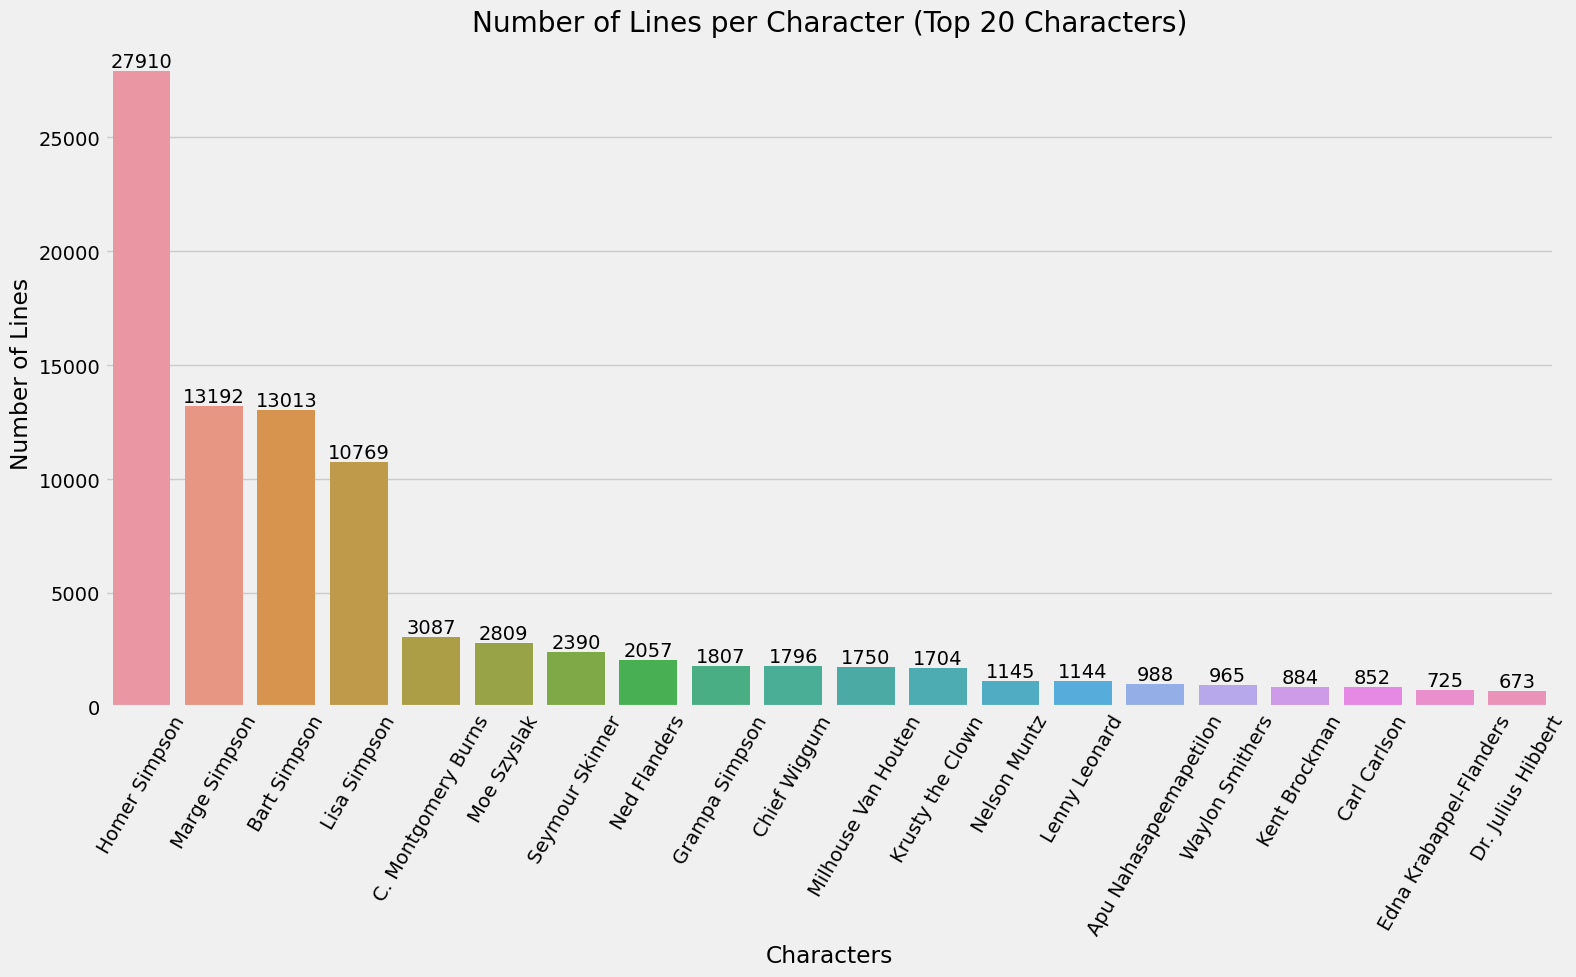

In [38]:
plt.figure(figsize = (16,10))
ax = sns.barplot(x = 'Characters', y = 'Number of Lines', data = top_20_characters)
ax.set_xticklabels(top_20_characters['Characters'], rotation = 60)
ax.bar_label(ax.containers[0])
plt.title('Number of Lines per Character (Top 20 Characters)')
plt.tight_layout()
plt.show()

## Next, we're going to take a look at the locations dataframe. By itself, it's not very useful, but we can see each location has its own ID, so we can combine that with another table later.

In [39]:
locations = pd.read_csv('simpsons_locations.csv')
locations.head()

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


## Similarly, the characters table doesn't contain much data we can use right now. One thing we can do is see what the gender balance looks like!

In [40]:
characters = pd.read_csv('simpsons_characters.csv')
characters.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [41]:
characters.dropna().reset_index(drop = True, inplace = True)

In [42]:
#Dropping any characters that don't have a gender value of m or f
characters = characters[(characters['gender'] == 'm') | (characters['gender'] == 'f')]
characters

,id,name,normalized_name,gender
70,1,Marge Simpson,marge simpson,f
71,8,Bart Simpson,bart simpson,m
72,9,Lisa Simpson,lisa simpson,f
73,17,Moe Szyslak,moe szyslak,m
74,3,Seymour Skinner,seymour skinner,m
...,...,...,...,...
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m


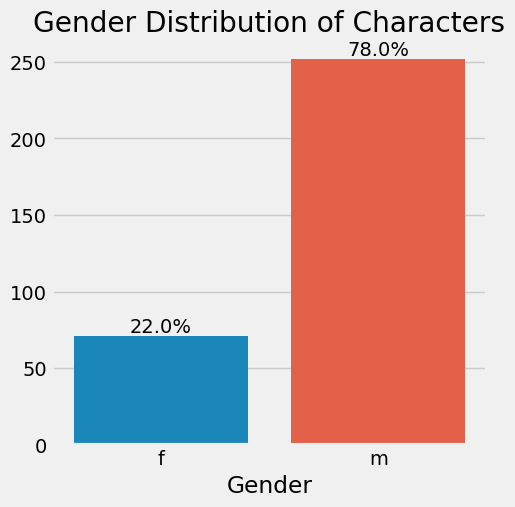

In [43]:
#Looks like the Simpsons cast is overwhelmingly male
plt.figure(figsize = (5,5))
ax = sns.countplot(data = characters, x = 'gender')
plt.title('Gender Distribution of Characters')
plt.xlabel('Gender')
plt.ylabel('')


#This part below is how we add the percentages on top of each bar 
ncount = len(characters)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + .05
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x, y), ha = 'center', va = 'bottom')
    
plt.show()

Now, we're going to add the episode title to the lines dataframe. It looks like we only have transcript data on 564 episodes looking at the mini dataframe we created, 

In [44]:
lines = pd.merge(lines, episodes[['episode_id', 'title']])
lines.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,title
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31,Lisa's Substitute
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3,Lisa's Substitute
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22,Lisa's Substitute
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5,Lisa's Substitute
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,true,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33,Lisa's Substitute


In [45]:
lines.groupby(by = 'episode_id').count()['id'].to_frame()

,id
episode_id,
1,333
2,271
3,207
4,304
5,283
...,...
564,241
565,230
566,202


Looks like on average, the number of lines per episode slowly decreases, with a few episodes here and there with a very low line count. Let's find out what the episode with the lowest count is!

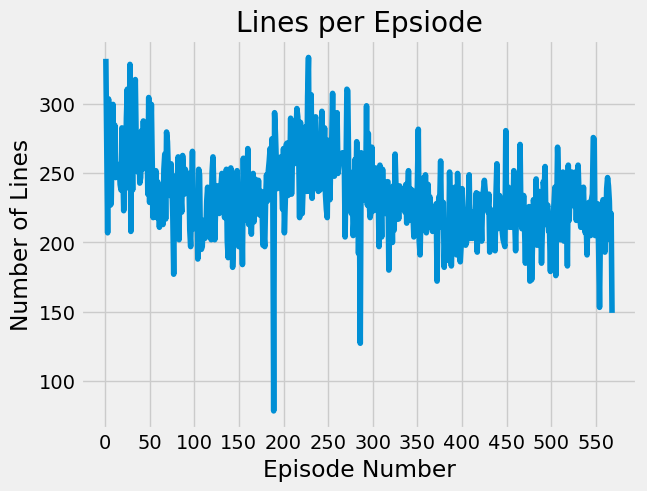

In [46]:
sns.lineplot(x = 'episode_id', y = 'id', data = lines.groupby(by = 'episode_id').count()['id'].to_frame()).set_xticks(range(0, 600, 50))
plt.title('Lines per Epsiode')
plt.xlabel('Episode Number')
plt.ylabel('Number of Lines')

plt.show()

In [47]:
#Looks like the episode with the least lines is number 189, All Singing, All Dancing
episodes.iloc[lines.groupby('episode_id').count()['speaking_line'].argmin()]

imdb_rating                                    5.1
imdb_votes                                  1119.0
number_in_season                                11
episode_id                                     189
original_air_date                       1998-01-04
original_air_year                             1998
production_code                               5F24
season                                           9
title                     All Singing, All Dancing
us_viewers_in_millions                         8.9
views                                      15780.0
Name: 189, dtype: object

## Now we're going to do a bit of feature engineering here. We've grouped the lines dataframe by episode ID, and have created a list of all the characters who have a speaking line.

In [48]:
#This creates a list of all the unique characters who have a speaking role per episode ID
lines.groupby('episode_id')['raw_character_text'].unique()

episode_id
1      [Marge Simpson, Homer Simpson, Seymour Skinner...
2      [Bart Simpson, Lisa Simpson, Marge Simpson, Ho...
3      [Rod #2, Rod #1, Edna Krabappel-Flanders, Bart...
4      [Bart Simpson, Lisa Simpson, Homer Simpson, Ma...
5      [Bart Simpson, Marge Simpson, Homer Simpson, L...
                             ...                        
564    [Lisa Simpson, Homer Simpson, Marge Simpson, M...
565    [Milhouse Van Houten, YOUNG JEWISH MAN, YOUNG ...
566    [Singers, Homer Simpson, Marge Simpson, Little...
567    [Workman, Bart Simpson, Homer Simpson, Lisa Si...
568    [Lisa Simpson, Chief Wiggum, Lou, Marge Simpso...
Name: raw_character_text, Length: 564, dtype: object

In [49]:
#This is another way to do it. It creates it a dataframe
lines.groupby('episode_id')['raw_character_text'].agg(['unique'])

,unique
episode_id,
1,"[Marge Simpson, Homer Simpson, Seymour Skinner..."
2,"[Bart Simpson, Lisa Simpson, Marge Simpson, Ho..."
3,"[Rod #2, Rod #1, Edna Krabappel-Flanders, Bart..."
4,"[Bart Simpson, Lisa Simpson, Homer Simpson, Ma..."
5,"[Bart Simpson, Marge Simpson, Homer Simpson, L..."
...,...
564,"[Lisa Simpson, Homer Simpson, Marge Simpson, M..."
565,"[Milhouse Van Houten, YOUNG JEWISH MAN, YOUNG ..."
566,"[Singers, Homer Simpson, Marge Simpson, Little..."


In [50]:
#This method fails at first because it looks like like the dtype of the column is object, so it contains multiple types
#lines.groupby('episode_id')['raw_character_text'].apply(lambda x: list(np.unique(x)))

In [51]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132097 entries, 0 to 132096
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  132097 non-null  int64  
 1   episode_id          132097 non-null  int64  
 2   number              132097 non-null  int64  
 3   raw_text            132097 non-null  object 
 4   timestamp_in_ms     132097 non-null  object 
 5   speaking_line       132097 non-null  object 
 6   character_id        132095 non-null  object 
 7   location_id         131720 non-null  float64
 8   raw_character_text  132095 non-null  object 
 9   raw_location_text   131720 non-null  object 
 10  spoken_words        132097 non-null  object 
 11  normalized_text     132072 non-null  object 
 12  word_count          132097 non-null  int64  
 13  title               132097 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.1+ MB


In [52]:
#Here I convert it to string type and it works
lines.raw_character_text = lines.raw_character_text.astype('str')

In [53]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132097 entries, 0 to 132096
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  132097 non-null  int64  
 1   episode_id          132097 non-null  int64  
 2   number              132097 non-null  int64  
 3   raw_text            132097 non-null  object 
 4   timestamp_in_ms     132097 non-null  object 
 5   speaking_line       132097 non-null  object 
 6   character_id        132095 non-null  object 
 7   location_id         131720 non-null  float64
 8   raw_character_text  132097 non-null  object 
 9   raw_location_text   131720 non-null  object 
 10  spoken_words        132097 non-null  object 
 11  normalized_text     132072 non-null  object 
 12  word_count          132097 non-null  int64  
 13  title               132097 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.1+ MB


In [54]:
#this is a third way to do it, but it also alphabetizes them, but doesn't create a data frame
lines.groupby('episode_id')['raw_character_text'].apply(lambda x: list(np.unique(x)))

episode_id
1      [Announcer, Barney Gumble, Bart Simpson, Bubbl...
2      [Bart Simpson, Calvin, Cecile Shapiro, Conduct...
3      [Bart Simpson, C. Montgomery Burns, COUNCILMEN...
4      [Announcer, BOXING ANNOUNCER, Barney Gumble, B...
5      [ALL AT THE TABLE, All, Bart Simpson, Elderly ...
                             ...                        
564    [Arnie Pye, Bart Simpson, C. Montgomery Burns,...
565    [ALBERT, Adult Bart, Adult Lisa, Bart Simpson,...
566    [BOOK CLUB MEMBER, Barney Gumble, C. Montgomer...
567    [AGED MOE, Apu Nahasapeemapetilon, Bart Simpso...
568    [Agnes Skinner, Apu Nahasapeemapetilon, Bart S...
Name: raw_character_text, Length: 564, dtype: object

In [55]:
#Just checking the characters that appear in episode 1
lines[lines['episode_id'] == 1]['raw_character_text'].unique()

array(['Marge Simpson', 'Homer Simpson', 'Seymour Skinner', 'JANEY',
       'Todd Flanders', 'Dewey Largo', 'Children', 'Bart Simpson',
       'Patty Bouvier', 'Lisa Simpson', 'Ned Flanders',
       'Mechanical Santa', 'Tattoo Man', 'Waylon Smithers',
       'C. Montgomery Burns', 'DOCTOR ZITSOFSKY', 'Moe Szyslak',
       'Barney Gumble', 'Interviewer', 'Students', 'Teacher',
       'Selma Bouvier', 'Voice', 'Little Boy', 'Milhouse Van Houten',
       'Lewis Clark', 'Little Girl', 'Clerk', 'Bubbles', 'Moldy',
       'Grampa Simpson', 'Father', 'Announcer', 'Ticket Seller', 'Elf #1',
       'Elves', "Dog's Owner"], dtype=object)

Now we're going to create a dataframe and then merge it with the episodes dataframe, so we have a column that now shows all of the speaking characters.

In [56]:
#Creating a data frame
characters_per_episode = lines.groupby('episode_id')['raw_character_text'].agg(['unique']).reset_index()
characters_per_episode

,episode_id,unique
0,1,"[Marge Simpson, Homer Simpson, Seymour Skinner..."
1,2,"[Bart Simpson, Lisa Simpson, Marge Simpson, Ho..."
2,3,"[Rod #2, Rod #1, Edna Krabappel-Flanders, Bart..."
3,4,"[Bart Simpson, Lisa Simpson, Homer Simpson, Ma..."
4,5,"[Bart Simpson, Marge Simpson, Homer Simpson, L..."
...,...,...
559,564,"[Lisa Simpson, Homer Simpson, Marge Simpson, M..."
560,565,"[Milhouse Van Houten, YOUNG JEWISH MAN, YOUNG ..."
561,566,"[Singers, Homer Simpson, Marge Simpson, Little..."
562,567,"[Workman, Bart Simpson, Homer Simpson, Lisa Si..."


In [57]:
#Now we are adding this list of characters to the episode dataframe
episodes = pd.merge(episodes, characters_per_episode[['episode_id', 'unique']])

In [58]:
episodes.head()

,imdb_rating,imdb_votes,number_in_season,episode_id,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,views,unique
0,8.2,3734.0,1,1,1989-12-17,1989,7G08,1,Simpsons Roasting on an Open Fire,26.7,171408.0,"[Marge Simpson, Homer Simpson, Seymour Skinner..."
1,7.8,1973.0,2,2,1990-01-14,1990,7G02,1,Bart the Genius,24.5,91423.0,"[Bart Simpson, Lisa Simpson, Marge Simpson, Ho..."
2,7.5,1709.0,3,3,1990-01-21,1990,7G03,1,Homer's Odyssey,27.5,78072.0,"[Rod #2, Rod #1, Edna Krabappel-Flanders, Bart..."
3,7.8,1701.0,4,4,1990-01-28,1990,7G04,1,There's No Disgrace Like Home,20.2,67378.0,"[Bart Simpson, Lisa Simpson, Homer Simpson, Ma..."
4,8.1,1732.0,5,5,1990-02-04,1990,7G05,1,Bart the General,27.1,63129.0,"[Bart Simpson, Marge Simpson, Homer Simpson, L..."


In [59]:
#looks like Principal Skinner is in 296 out of the 564 episodes. I also noticed that the maximum is 564 episodes, so it looks like some episodes may be missing
skinner = 0
for x in episodes['unique']:
    for y in x:
        if y == 'Seymour Skinner':
            skinner += 1
print(skinner)

296


In [60]:
#I check here, yep we are missing this episode
episodes[episodes['title'] == 'Treehouse of Horror XIX']

,imdb_rating,imdb_votes,number_in_season,episode_id,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,views,unique


In [61]:
#The way to read this is, for every item in episodes.unique, for every x in item, yield x, then take a count of all the values
#So for each value in episodes.unique, and for each x in that value, value counts
character_counts = pd.Series([x for item in episodes.unique for x in item]).value_counts()

Looking at the character counts series we created, there is only one episode in which Marge Simpson does not speak in. Let's see which one that is!

In [62]:
character_counts

Homer Simpson       564
Marge Simpson       563
Bart Simpson        562
Lisa Simpson        562
Moe Szyslak         376
                   ... 
Archie Bunker         1
JODY PRICE            1
Reporter #4           1
Football Players      1
SECURITY THUG #2      1
Length: 6280, dtype: int64

In [63]:
#So we're using this loop to check every entry, and if Marge Simpson does not appear, it will display row it doesn't appear
count = 0
for x in episodes['unique']:
    if 'Marge Simpson' not in x:
        print(episodes.loc[count])
    count += 1

imdb_rating                                                             8.2
imdb_votes                                                           1269.0
number_in_season                                                         22
episode_id                                                               81
original_air_date                                                1993-05-13
original_air_year                                                      1993
production_code                                                        9F19
season                                                                    4
title                                                 Krusty Gets Kancelled
us_viewers_in_millions                                                 19.4
views                                                               59948.0
unique                    [Announcer, Kent Brockman, Jacqueline, Rainier...
Name: 80, dtype: object


## I'm interested in finding out who the most popular side characters are. From the character_counts dataframe earlier, we'll slice the 10 most commonly recurring side characters.

In [64]:
side_characters = character_counts[4:14]
side_characters

Moe Szyslak            376
Milhouse Van Houten    323
Lenny Leonard          319
Chief Wiggum           316
Seymour Skinner        296
Carl Carlson           281
Ned Flanders           280
Nelson Muntz           275
Grampa Simpson         263
C. Montgomery Burns    240
dtype: int64

In [65]:
#Before, this was giving us an error "local variable 'score_per_character' referenced before assignment"
#We resolve this by putting global into the score counts so we don't reassign them
list_scores = []
def side_character_popularity(x):
    '''This function iterates through a list and checks the values in the episodes['unique'] column to see if it appears. 
    If it does, then it increases a counter called count, and also adds the episodes IMDB rating to another variable.
    Then it divides up the total IMDB score and divides it by the number of character appearances to get an average score.'''
    global score_per_character, count, count2, list_scores
    for t in x:
        score_per_character = 0
        count = 0
        count2 = 0
        for y in episodes['unique']:
            for z in y:
                if z == t:
                    score_per_character += episodes['imdb_rating'][count2]
                    count += 1
            count2 += 1
        list_scores.append(score_per_character/count)    
        print("{}'s overall score is {}".format(t, score_per_character/count))

In [66]:
side_character_popularity(side_characters.index)

Moe Szyslak's overall score is 7.378191489361698
Milhouse Van Houten's overall score is 7.396594427244581
Lenny Leonard's overall score is 7.282131661442007
Chief Wiggum's overall score is 7.433227848101264
Seymour Skinner's overall score is 7.461148648648652
Carl Carlson's overall score is 7.2644128113879
Ned Flanders's overall score is 7.457500000000003
Nelson Muntz's overall score is 7.357090909090909
Grampa Simpson's overall score is 7.465779467680599
C. Montgomery Burns's overall score is 7.479166666666667


In [67]:
list_scores

[7.378191489361698,
 7.396594427244581,
 7.282131661442007,
 7.433227848101264,
 7.461148648648652,
 7.2644128113879,
 7.457500000000003,
 7.357090909090909,
 7.465779467680599,
 7.479166666666667]

In [68]:
#Now we're creating a dataframe using list of scores and their characters
side_character_scores = pd.DataFrame({'Characters':side_characters.index, 'Scores':list_scores})
side_character_scores

,Characters,Scores
0,Moe Szyslak,7.378191
1,Milhouse Van Houten,7.396594
2,Lenny Leonard,7.282132
3,Chief Wiggum,7.433228
4,Seymour Skinner,7.461149
5,Carl Carlson,7.264413
6,Ned Flanders,7.457500
7,Nelson Muntz,7.357091
8,Grampa Simpson,7.465779
9,C. Montgomery Burns,7.479167


In [69]:
#We want to order it by descending score, and also reset the index
side_character_scores = side_character_scores.sort_values(by = 'Scores', ascending = False).reset_index(drop = True)

In [70]:
#Here we're making a dataframe with the characters and the number of times they appear
side_characters.to_frame().rename(columns = {0:'Appearances'}).reset_index().rename(columns = {'index':'Characters'})

,Characters,Appearances
0,Moe Szyslak,376
1,Milhouse Van Houten,323
2,Lenny Leonard,319
3,Chief Wiggum,316
4,Seymour Skinner,296
5,Carl Carlson,281
6,Ned Flanders,280
7,Nelson Muntz,275
8,Grampa Simpson,263
9,C. Montgomery Burns,240


In [71]:
#We're now creating a new dataframe that merges the appears and scores by the Characters column
side_characters_scores = side_character_scores.merge(side_characters.to_frame().rename(columns = {0:'Appearances'}).reset_index().rename(columns = {'index':'Characters'}), on = 'Characters')

In [72]:
#We're rounding the IMDB scores to 2 decimal places
side_characters_scores['Scores'] = round(side_characters_scores['Scores'], 2)
side_characters_scores 

,Characters,Scores,Appearances
0,C. Montgomery Burns,7.48,240
1,Grampa Simpson,7.47,263
2,Seymour Skinner,7.46,296
3,Ned Flanders,7.46,280
4,Chief Wiggum,7.43,316
5,Milhouse Van Houten,7.40,323
6,Moe Szyslak,7.38,376
7,Nelson Muntz,7.36,275
8,Lenny Leonard,7.28,319
9,Carl Carlson,7.26,281


## Now we're going to create a twin graph with a bar plot and line plot on one figure. We're going to show the exact IMDB scores and the total number of episodes a character speaks in. We can see that despite having the least number of appearances by a large margin, Mr. Burns remains one of the most popular characters.

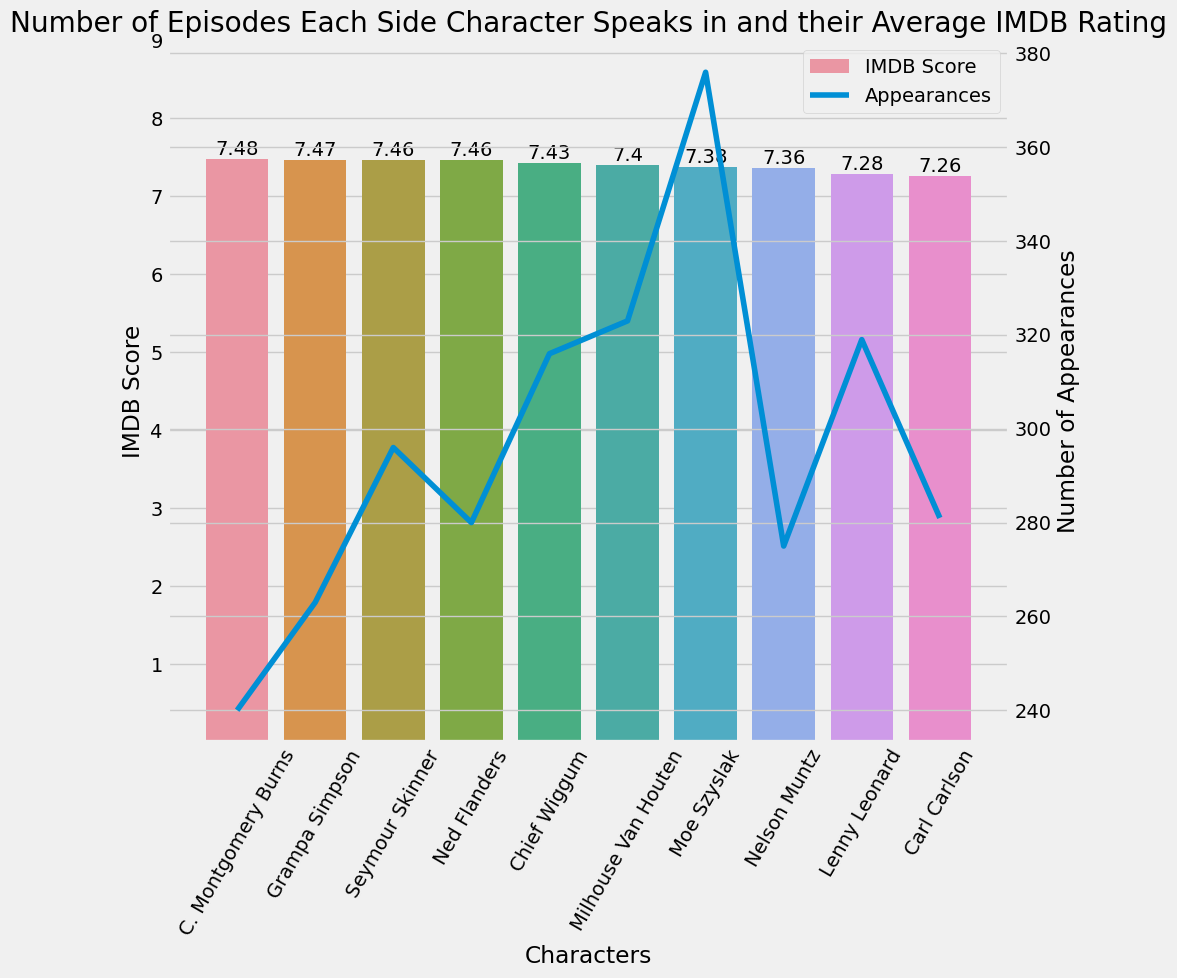

In [73]:
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'Characters', y = 'Scores', data = side_characters_scores, label = 'IMDB Score')
ax2 = ax.twinx()
ax2.plot(side_characters_scores['Appearances'], label = 'Appearances')
ax.set_xticklabels(side_characters_scores['Characters'],rotation = 60)
ax.set_ylabel('IMDB Score')
ax2.set_ylabel('Number of Appearances')
ax.bar_label(ax.containers[0])
lines1, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels + labels2, loc=1)
ax.set_yticks(range(1,10))
plt.title('Number of Episodes Each Side Character Speaks in and their Average IMDB Rating')
plt.tight_layout()
plt.show()

## Next we're going to create a horizontal bar graph showing the number of lines at each location.

In [74]:
locations = lines['raw_location_text'].value_counts().head(20)
locations

Simpson Home                       30157
Springfield Elementary School       5970
Moe's Tavern                        3997
Springfield Nuclear Power Plant     3030
Kwik-E-Mart                         1258
Simpson Living Room                 1172
First Church of Springfield         1151
Springfield Street                  1032
Simpson Car                          998
Springfield                          996
Flanders Home                        985
Springfield Town Hall                931
Springfield Retirement Castle        882
Street                               862
Burns Manor                          842
Courtroom                            713
Springfield Mall                     691
Simpson Kitchen                      687
Bart's Treehouse                     654
Bart's Bedroom                       615
Name: raw_location_text, dtype: int64

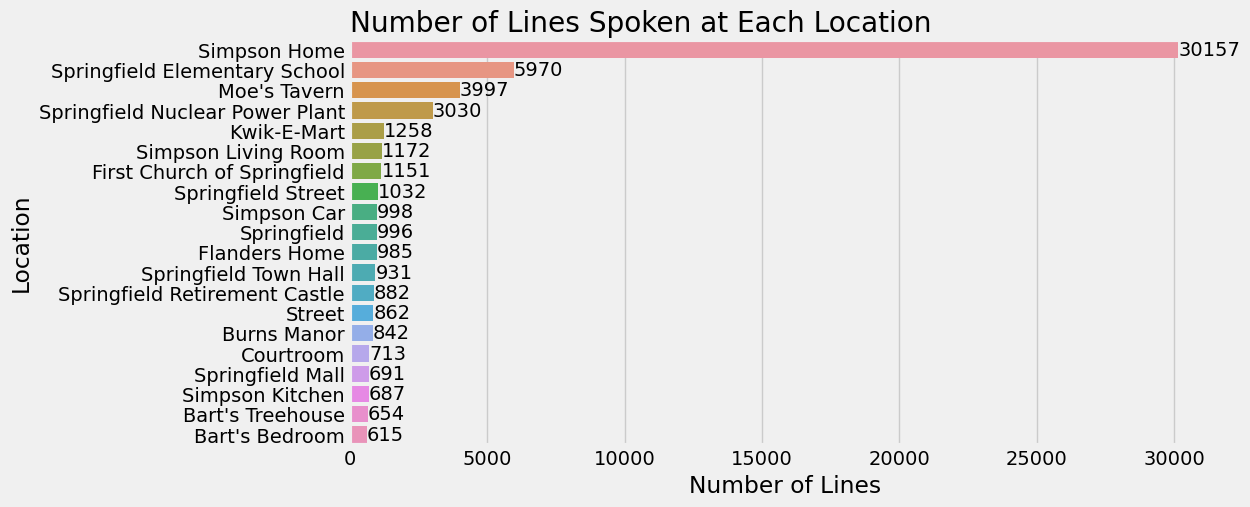

In [75]:
plt.figure(figsize = (10,5))
ax = sns.barplot(y = locations.index, x = locations.values)
plt.title('Number of Lines Spoken at Each Location', loc = 'Left')
ax.set_xlabel('Number of Lines')
ax.set_ylabel('Location')
ax.bar_label(ax.containers[0])
plt.show()

## We're going to create a visualization showing the 6 characters with the highest number of voicelines for the 6 most common locations.

In [76]:
top_6_locations = lines.groupby(by = 'raw_location_text')['raw_character_text'].count().to_frame().sort_values(by = 'raw_character_text', ascending = False)[0:6].index
top_6_locations

Index(['Simpson Home', 'Springfield Elementary School', 'Moe's Tavern',
       'Springfield Nuclear Power Plant', 'Kwik-E-Mart',
       'Simpson Living Room'],
      dtype='object', name='raw_location_text')

In [77]:
lines[lines['raw_location_text'] == 'Simpson Home']['raw_character_text'].value_counts().head(6).to_frame()

,raw_character_text
Homer Simpson,9109
Marge Simpson,5851
Bart Simpson,3903
Lisa Simpson,3605
Grampa Simpson,497
Ned Flanders,407


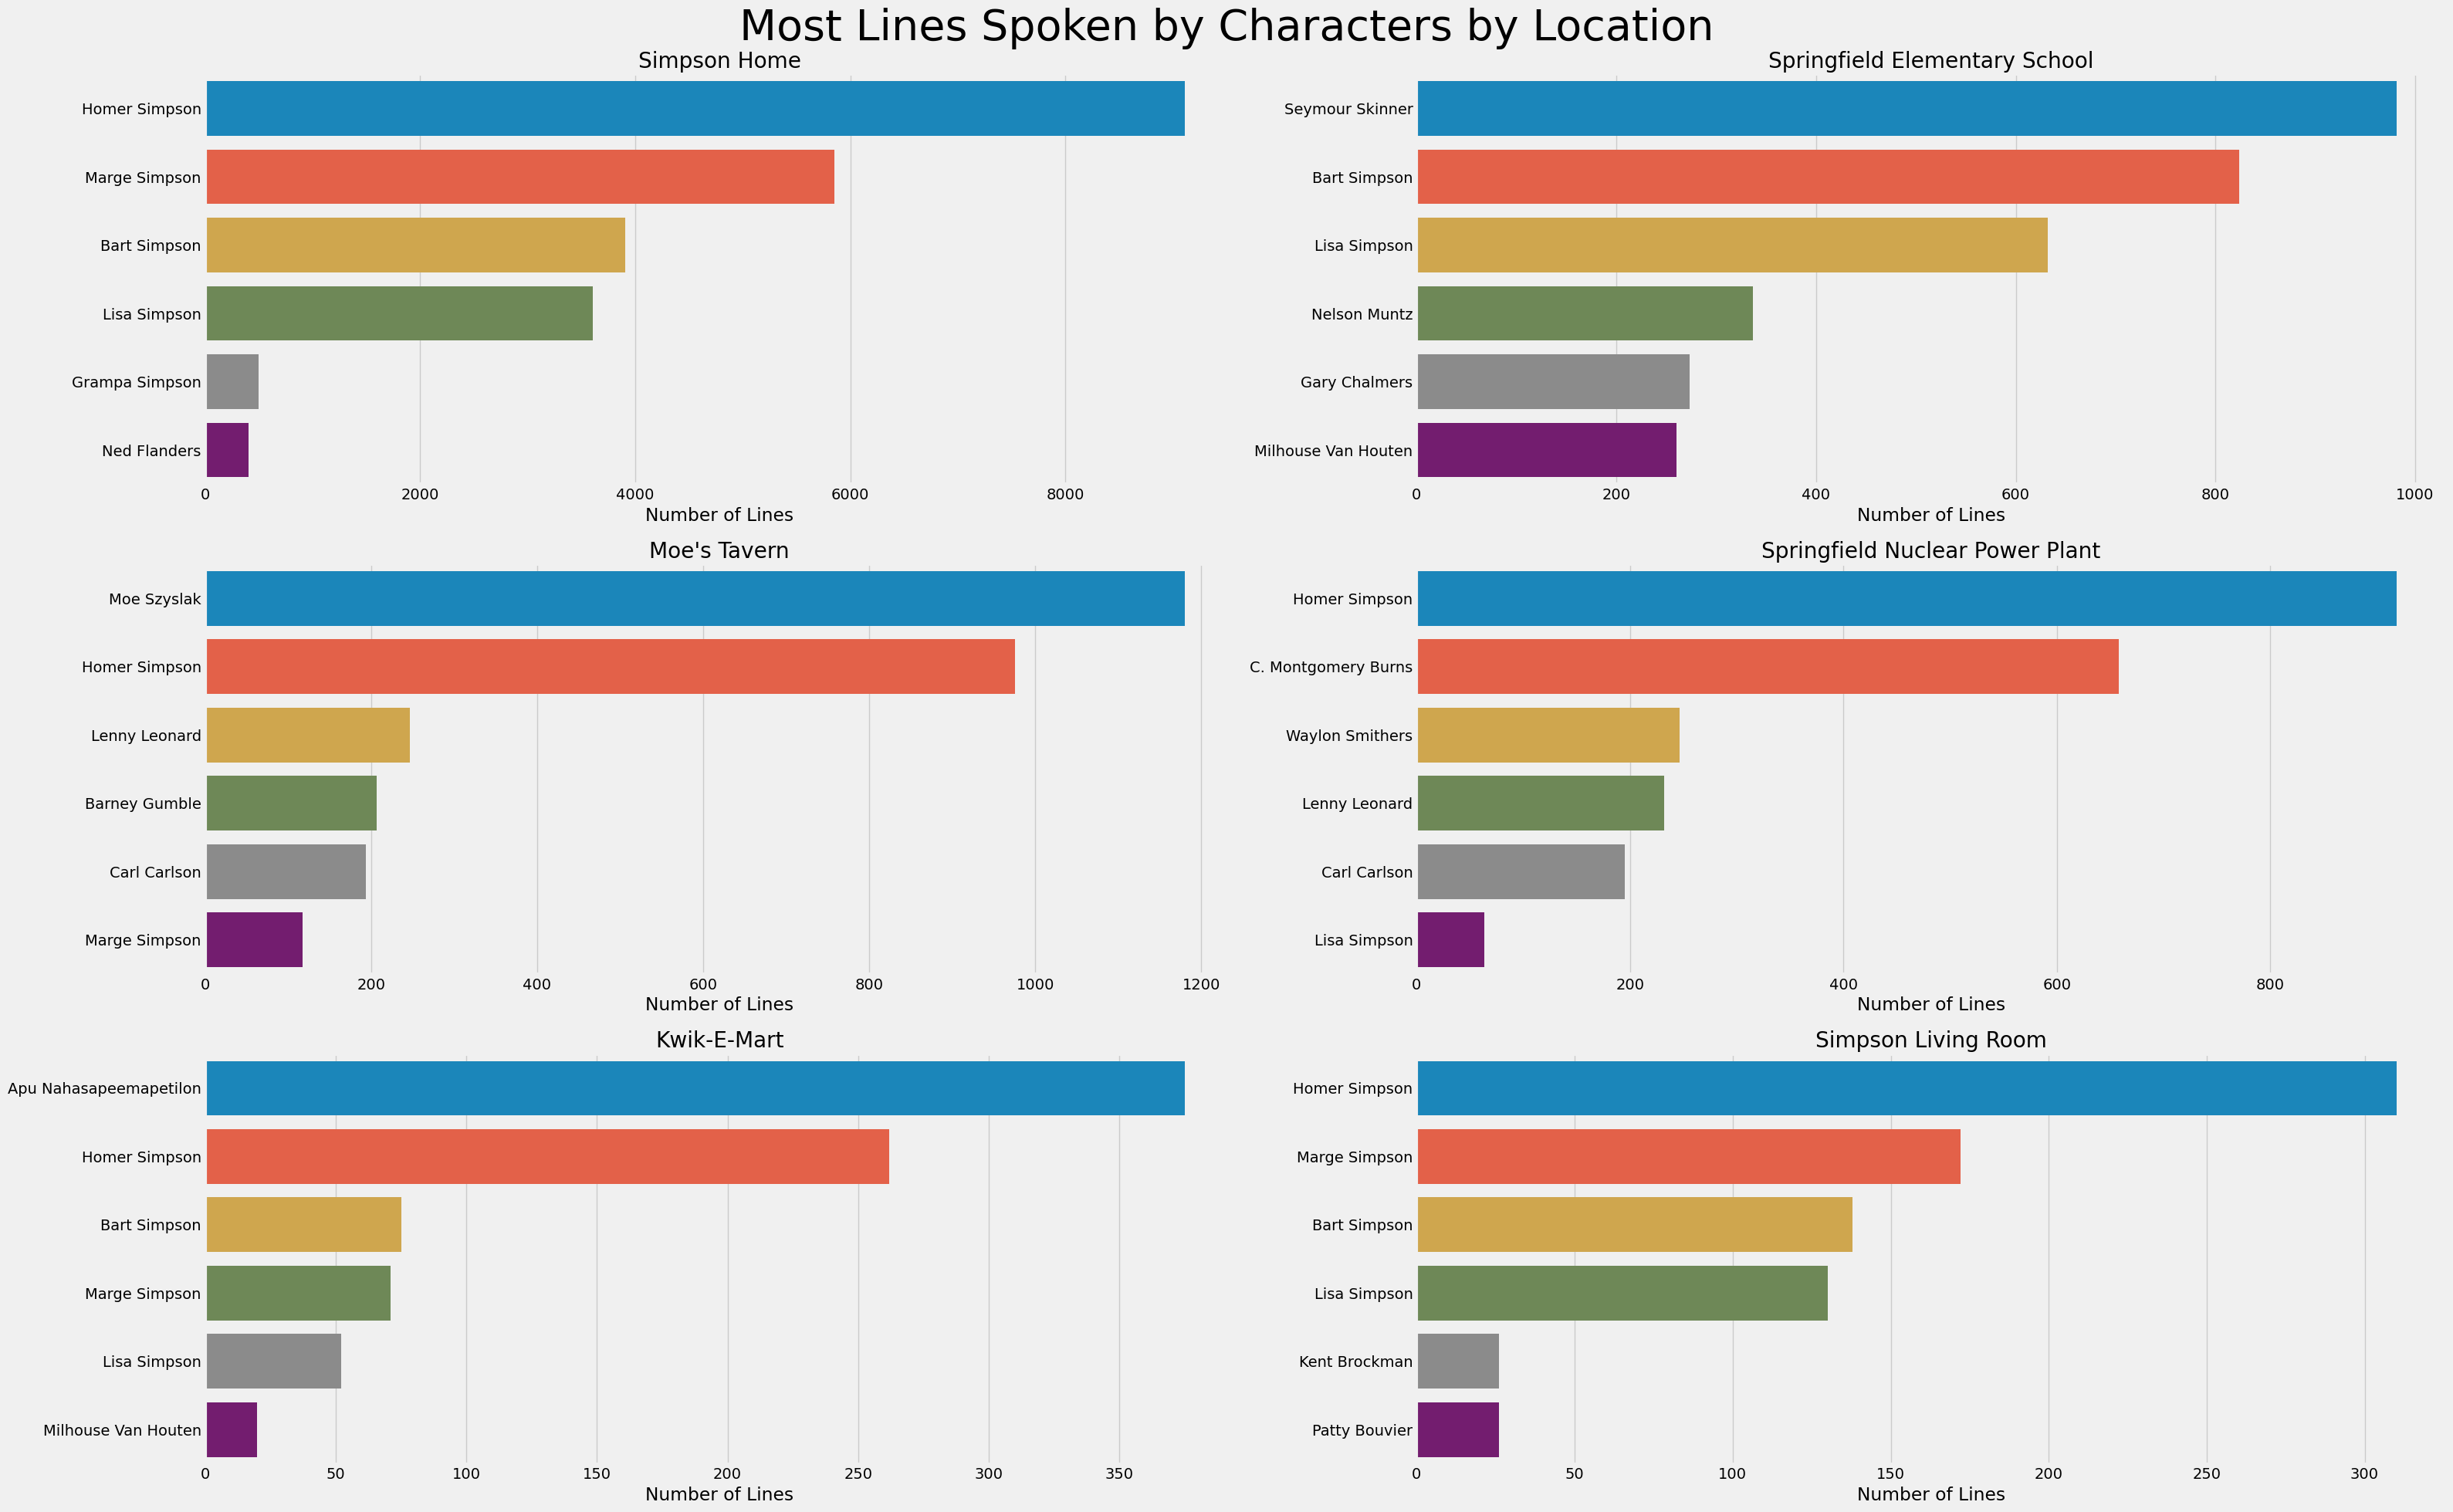

In [78]:
#We have to set it up like this, because plt.subplots sets up a 2 dimensional 3x2 array, so we need to set them up in 3 pairs
#This works too
# fig, axes = plt.subplots(
#                      ncols=2,
#                      nrows=2,
#                      figsize=(15, 6))

# ax1, ax2, ax3, ax4 = axes.flatten()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2,figsize=(32,20))
sns.barplot(y = lines[lines['raw_location_text'] == 'Simpson Home']['raw_character_text'].value_counts().head(6).to_frame().index, x = lines[lines['raw_location_text'] == 'Simpson Home']['raw_character_text'].value_counts().head(6).to_frame()['raw_character_text'], ax = ax1)
plt.suptitle('Most Lines Spoken by Characters by Location', fontsize = 40)
ax1.title.set_text('Simpson Home')
ax1.set_xlabel('Number of Lines')

sns.barplot(y = lines[lines['raw_location_text'] == 'Springfield Elementary School']['raw_character_text'].value_counts().head(6).to_frame().index, x = lines[lines['raw_location_text'] == 'Springfield Elementary School']['raw_character_text'].value_counts().head(6).to_frame()['raw_character_text'], ax = ax2)
ax2.title.set_text('Springfield Elementary School')
ax2.set_xlabel('Number of Lines')

sns.barplot(y = lines[lines['raw_location_text'] == "Moe's Tavern"]['raw_character_text'].value_counts().head(6).to_frame().index, x = lines[lines['raw_location_text'] == "Moe's Tavern"]['raw_character_text'].value_counts().head(6).to_frame()['raw_character_text'], ax = ax3)
ax3.title.set_text("Moe's Tavern")
ax3.set_xlabel('Number of Lines')

sns.barplot(y = lines[lines['raw_location_text'] == 'Springfield Nuclear Power Plant']['raw_character_text'].value_counts().head(6).to_frame().index, x = lines[lines['raw_location_text'] == 'Springfield Nuclear Power Plant']['raw_character_text'].value_counts().head(6).to_frame()['raw_character_text'], ax = ax4)
ax4.title.set_text('Springfield Nuclear Power Plant')
ax4.set_xlabel('Number of Lines')

sns.barplot(y = lines[lines['raw_location_text'] == 'Kwik-E-Mart']['raw_character_text'].value_counts().head(6).to_frame().index, x = lines[lines['raw_location_text'] == 'Kwik-E-Mart']['raw_character_text'].value_counts().head(6).to_frame()['raw_character_text'], ax = ax5)
ax5.title.set_text('Kwik-E-Mart')
ax5.set_xlabel('Number of Lines')

sns.barplot(y = lines[lines['raw_location_text'] == 'Simpson Living Room']['raw_character_text'].value_counts().head(6).to_frame().index, x = lines[lines['raw_location_text'] == 'Simpson Living Room']['raw_character_text'].value_counts().head(6).to_frame()['raw_character_text'], ax = ax6)
ax6.title.set_text('Simpson Living Room')
ax6.set_xlabel('Number of Lines')

plt.tight_layout()

## Now I want to see if there's any correlation between side characters. Through our domain knowledge, we know that certain side characters are associated with each other, or often show up together. I have a list of side characters below I'm interested in checking out. 

In [79]:
side_character_correlation = episodes.copy()
side_character_correlation.head()

,imdb_rating,imdb_votes,number_in_season,episode_id,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,views,unique
0,8.2,3734.0,1,1,1989-12-17,1989,7G08,1,Simpsons Roasting on an Open Fire,26.7,171408.0,"[Marge Simpson, Homer Simpson, Seymour Skinner..."
1,7.8,1973.0,2,2,1990-01-14,1990,7G02,1,Bart the Genius,24.5,91423.0,"[Bart Simpson, Lisa Simpson, Marge Simpson, Ho..."
2,7.5,1709.0,3,3,1990-01-21,1990,7G03,1,Homer's Odyssey,27.5,78072.0,"[Rod #2, Rod #1, Edna Krabappel-Flanders, Bart..."
3,7.8,1701.0,4,4,1990-01-28,1990,7G04,1,There's No Disgrace Like Home,20.2,67378.0,"[Bart Simpson, Lisa Simpson, Homer Simpson, Ma..."
4,8.1,1732.0,5,5,1990-02-04,1990,7G05,1,Bart the General,27.1,63129.0,"[Bart Simpson, Marge Simpson, Homer Simpson, L..."


In [80]:
side_characters_appearances_list = ['Carl Carlson', 'Lenny Leonard', 'Waylon Smithers', 'C. Montgomery Burns', 'Lionel Hutz', 'Ned Flanders', 'Seymour Skinner', 'Chief Wiggum', 'Moe Szyslak', 'Barney Gumble']

In [81]:
#The .map function basically iterates through every name in the side_characters_appearances_list and creates a 
#column dedicated to that character. It then checks if the name appears in the 'unique' column. If it does, it 
#uses a lambda expression to check if Carl Carlson is in it and assigns it a 1 to the row if true, and a 0 if false

for y in side_characters_appearances_list:
    side_character_correlation[y] = side_character_correlation['unique'].map(lambda x: 1 if y in x else 0)

In [82]:
side_character_corr = side_character_correlation[side_characters_appearances_list].corr()
#It looks like Lenny and Carl are the most closely correlated characters, followed by Mr. Burns and Smithers.
side_character_corr

,Carl Carlson,Lenny Leonard,Waylon Smithers,C. Montgomery Burns,Lionel Hutz,Ned Flanders,Seymour Skinner,Chief Wiggum,Moe Szyslak,Barney Gumble
Carl Carlson,1.000000,0.723032,0.166218,0.239736,-0.059539,0.046076,-0.053081,0.096880,0.313436,0.059711
Lenny Leonard,0.723032,1.000000,0.159518,0.233359,-0.054573,0.068904,-0.053137,0.124455,0.336402,0.060805
Waylon Smithers,0.166218,0.159518,1.000000,0.692093,0.075246,-0.014211,-0.037707,0.043816,0.110436,0.138109
C. Montgomery Burns,0.239736,0.233359,0.692093,1.000000,0.075996,0.034794,-0.028419,0.039968,0.136931,0.121179
Lionel Hutz,-0.059539,-0.054573,0.075246,0.075996,1.000000,0.010142,0.049672,0.034589,0.006091,0.114248
Ned Flanders,0.046076,0.068904,-0.014211,0.034794,0.010142,1.000000,0.078465,0.165185,0.085256,0.023901
Seymour Skinner,-0.053081,-0.053137,-0.037707,-0.028419,0.049672,0.078465,1.000000,0.144179,0.035148,0.016116
Chief Wiggum,0.096880,0.124455,0.043816,0.039968,0.034589,0.165185,0.144179,1.000000,0.146502,0.014085
Moe Szyslak,0.313436,0.336402,0.110436,0.136931,0.006091,0.085256,0.035148,0.146502,1.000000,0.243156
Barney Gumble,0.059711,0.060805,0.138109,0.121179,0.114248,0.023901,0.016116,0.014085,0.243156,1.000000


### We can see below that certain characters are very correlated with each other. Mr. Burns and Smithers work at the powerplant together, so they often appear together. Carl, Lenny, and Barney can often be found drinking at Moe's Tavern, so those 4 characters have some correlation as well. 

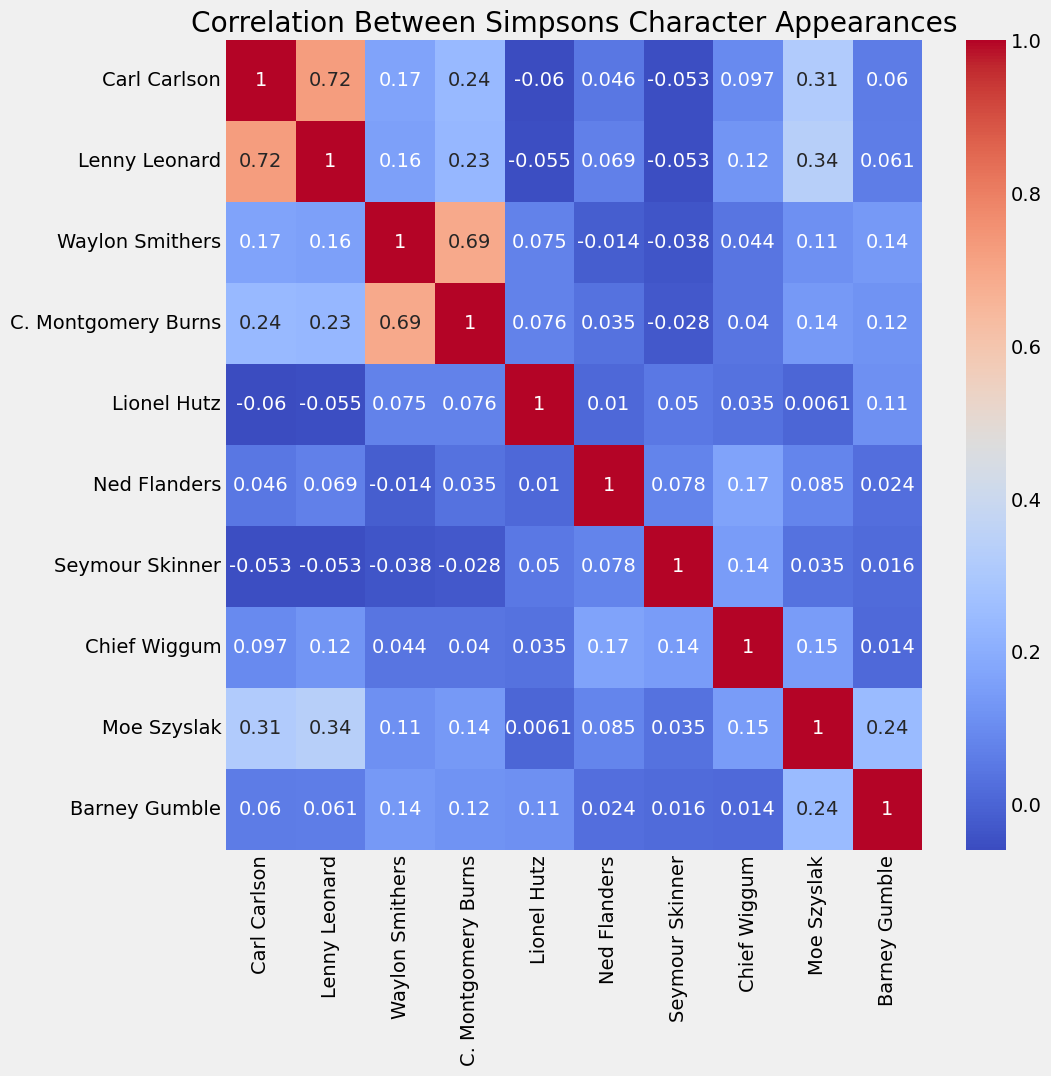

In [83]:
plt.figure(figsize = (10,10))
sns.heatmap(side_character_corr, cmap = 'coolwarm', annot = True)
plt.title('Correlation Between Simpsons Character Appearances')
plt.show()


In [84]:
#Now we want to see how often a character has appeared over time
#The cumsum function is a cumulative value, so in this case it adds up all the times Lenny has appeared
side_character_correlation['lenny_time'] = side_character_correlation['Lenny Leonard'].cumsum()

In [85]:
#Now we have a column that contains a running total of all the times Lenny has appeared
side_character_correlation.head()

,imdb_rating,imdb_votes,number_in_season,episode_id,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,...,Lenny Leonard,Waylon Smithers,C. Montgomery Burns,Lionel Hutz,Ned Flanders,Seymour Skinner,Chief Wiggum,Moe Szyslak,Barney Gumble,lenny_time
0,8.2,3734.0,1,1,1989-12-17,1989,7G08,1,Simpsons Roasting on an Open Fire,26.7,...,0,1,1,0,1,1,0,1,1,0
1,7.8,1973.0,2,2,1990-01-14,1990,7G02,1,Bart the Genius,24.5,...,0,0,0,0,0,1,0,0,0,0
2,7.5,1709.0,3,3,1990-01-21,1990,7G03,1,Homer's Odyssey,27.5,...,0,1,1,0,0,0,1,1,0,0
3,7.8,1701.0,4,4,1990-01-28,1990,7G04,1,There's No Disgrace Like Home,20.2,...,0,1,1,0,0,0,0,1,1,0
4,8.1,1732.0,5,5,1990-02-04,1990,7G05,1,Bart the General,27.1,...,0,0,0,0,0,1,0,0,0,0


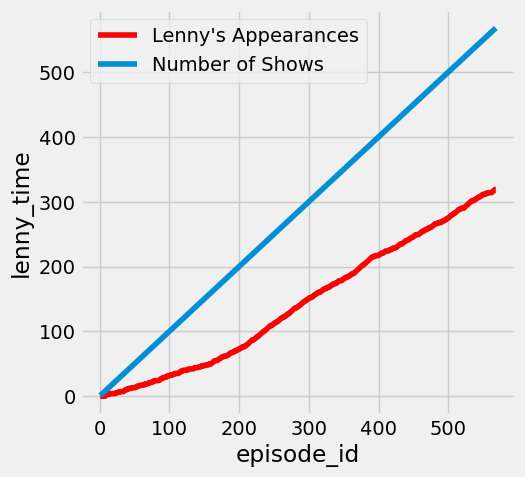

In [86]:
#It looks like there was a small dip in the number of times Lenny appeared from episodes 100 to 220, but then it rose back up and has remained somewhat consistent
plt.figure(figsize = (5,5))
ax = sns.lineplot(x = 'episode_id', y = 'lenny_time', data = side_character_correlation, color = 'red')
ax2 = sns.lineplot(x = 'episode_id', y = 'episode_id', data = side_character_correlation)
ax.set_yticks(range(0,550, 100))
plt.legend(labels = ["Lenny's Appearances", 'Number of Shows'])
plt.show()

One of my favorite characters is Lionel Hutz. Unfortunately we know that Phil Hartman, his voice actor, was murdered in 1998, and Lionel Hutz was retired. This reflects in the graph, with the number of times Lionel Hutz appears leveling off around episode 180.

In [87]:
side_character_correlation['lionel_time'] = side_character_correlation['Lionel Hutz'].cumsum()

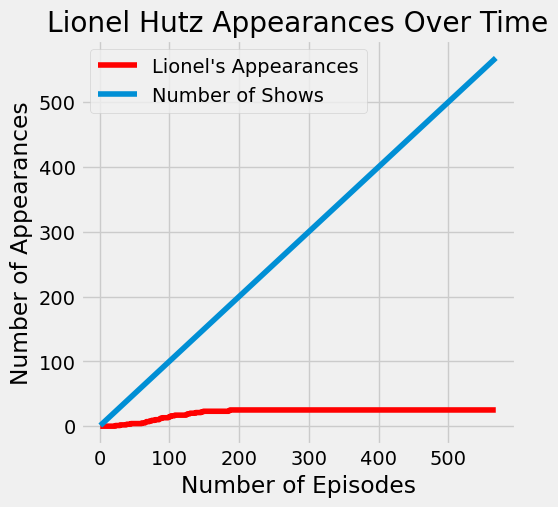

In [88]:
plt.figure(figsize = (5,5))
ax = sns.lineplot(x = 'episode_id', y = 'lionel_time', data = side_character_correlation, color = 'red')
ax2 = sns.lineplot(x = 'episode_id', y = 'episode_id', data = side_character_correlation)
ax.set_yticks(range(0,550, 100))
plt.legend(labels = ["Lionel's Appearances", 'Number of Shows'])
plt.title('Lionel Hutz Appearances Over Time')
plt.ylabel('Number of Appearances')
plt.xlabel('Number of Episodes')
plt.show()

## The last thing I want to do is to see the breakdown of how many lines the voice actors speak. I had to manually type up these lists. I used the list of characters listed on the Simpsons Wikipedia page, so this may not be entirely accurate, but it should be good enough.

In [89]:
DanCastellaneta = ['Homer Simpson', 'Grampa Simpson', 'Krusty the Clown', 'Barney Gumble', 
                    'Groundskeeper Willie', 'Mayor Joe Quimby', 'Hans Moleman', 'Sideshow Mel', 'Itchy', 'Gil Gunderson', 'Squeaky-Voiced Teen',
                   'Blue-Haired Lawyer', 'The Rich Texan', 'Kodos', 'Louie', 'Arnie Pye', 'Scott Christian', 'Charlie', 'Gary', 
                   'Lance Murdock', 'Leopold', 'Jake', 'Poochie', 'Frankie the Squealer', 'Rabbi Hyman Krustofsky', 'Lugash']

In [90]:
JulieKavner = ['Marge Simpson', 'Patty Bouvier', 'Selma Bouvier', 'Jacqueline Bouvier',
              'BARBARA']

In [91]:
NancyCartwright = ['Bart Simpson', 'Maggie Simpson', 'Nelson Muntz', 'Ralph Wiggum', 
                  'Kearney Zzyzwicz', 'Todd Flanders', 'Rod Flanders', 'Database', 'Richard', 
                  'Lewis Clark', 'Brittany']

In [92]:
YeardleySmith = ['Lisa Simpson', 'Eliza', 'Angelica Button', 'Cecile Shapiro']

In [93]:
HankAzaria = ['Moe Szyslak', 'Chief Wiggum', 'Apu Nahaspeemapetilon', 'Carl Carlson',
             'Comic Book Guy', 'Lou' 'Professor Jonathan Frink', 'Cletus Spuckler',
             'Gary Chalmers', 'Snake Jailbird', 'Captain Horatio McCallister', 'Kirk Van Houten',
             'Wiseguy', 'Bumblebee Man', 'Luigi', 'Old Jewish Man', 'Disco Stu', 'Dr. Nick Riviera', 
             'Duffman', 'Drederick Tatum', 'Julio', 'Johnny Tightlips', 'Coach Krupt', 'Doug', 
             'Pyro', 'Chase', 'Legs', 'Akira', 'Frank Grimes', 'Gunter', '"Just Stamp the Ticket" Man', 
             'Veterinarian', ]

In [94]:
HarryShearer = ['C. Montgomery Burns', 'Waylon Smithers', 'Ned Flanders', 'Principal Skinner', 
               'Lenny Leonard', 'Kent Brockman', 'Rev. Timothy Lovejoy', 'Dr. Julius Hibbert', 
               'Otto Mann', 'Jasper Beardly', 'Scratchy', 'Rainier Wolfcastle', 'McBain', 
               'Eddie', 'Dewey Largo', 'Judge Snyder', 'Kang', 'Marty', 'Dr. Marvin Monroe', 'God', 
               'George H. W. Bush', 'Herman Hermann', 'Dave Shutton', 'Dr. J. Loren Pyror', 'Sanjay Nahasapeemapetilon', 
               'Cesar', 'Tom Brokaw', 'Principal Dondelinger', 'Benjamin', 'Richard Nixon', 'Ronald Reagan', 
               'Legs', 'Radioactive Man', 'Jebediah Springfield', 'Mr. Bouvier', 'Ernst', 'Nedward Flanders, Sr.']

In [95]:
lines.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,title
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31,Lisa's Substitute
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3,Lisa's Substitute
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22,Lisa's Substitute
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5,Lisa's Substitute
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,true,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33,Lisa's Substitute


In [96]:
voice_actors = lines.copy()

In [97]:
#So what this does is that it checks the values in the raw_character_text column, and if the value is found in any of the lists we made
#It maps the name of the voice actor to a new Voice Actor column
voice_actors['Voice Actor'] = voice_actors['raw_character_text'].map(lambda x: 'Dan Castellaneta' if x in DanCastellaneta 
                                                                     else 'Julie Kavner' if x in JulieKavner 
                                                                     else 'Nancy Cartwright' if x in NancyCartwright
                                                                    else 'Yeardley Smith' if x in YeardleySmith
                                                                    else 'Hank Azaria' if x in HankAzaria
                                                                    else 'Harry Shearer' if x in HarryShearer
                                                                    else 0)

In [98]:
#Yep it looks like this worked correctly, Waylon Smithers is mapped as Harry Shearer
voice_actors[voice_actors['raw_character_text'] == 'Waylon Smithers'].head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,title,Voice Actor
911,10343,35,4,Waylon Smithers: Mr. Burns is never late. Some...,132000,true,14,397.0,Waylon Smithers,HILL NEAR NUCLEAR POWER PLANT,Mr. Burns is never late. Something must be ter...,mr burns is never late something must be terri...,10,Blood Feud,Harry Shearer
914,10347,35,8,"Waylon Smithers: Oh, no, Mr. Burns! We've got ...",145000,true,14,53.0,Waylon Smithers,Burns Manor,"Oh, no, Mr. Burns! We've got to get a doctor!",oh no mr burns weve got to get a doctor,10,Blood Feud,Harry Shearer
917,10350,35,11,"Waylon Smithers: (ANXIOUSLY) Damn it, doctor, ...",169000,true,14,53.0,Waylon Smithers,Burns Manor,"Damn it, doctor, I'm no idiot! I know what hyp...",damn it doctor im no idiot i know what hypohem...,23,Blood Feud,Harry Shearer
919,10352,35,13,Waylon Smithers: How long does it take to ster...,176000,true,14,53.0,Waylon Smithers,Burns Manor,How long does it take to sterilize a needle?,how long does it take to sterilize a needle,9,Blood Feud,Harry Shearer
921,10354,35,15,"Waylon Smithers: Well, skip it.",178000,true,14,53.0,Waylon Smithers,Burns Manor,"Well, skip it.",well skip it,3,Blood Feud,Harry Shearer


In [99]:
voice_actor_lines = voice_actors['Voice Actor'].value_counts().drop(index = 0).to_frame()
voice_actor_lines

,Voice Actor
Dan Castellaneta,34330
Nancy Cartwright,15277
Julie Kavner,14284
Harry Shearer,11032
Yeardley Smith,10807
Hank Azaria,8114


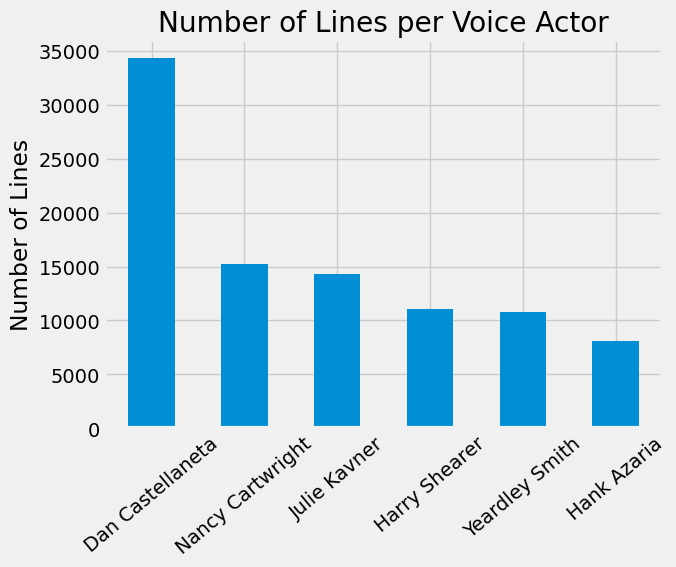

In [100]:
voice_actor_lines.plot(kind = 'bar', rot = 40, legend = False)
plt.title('Number of Lines per Voice Actor')
plt.ylabel('Number of Lines')
plt.show()

## Lastly, we're going to see how a character's popularity has changed over time compared to the overall series ratings.

In [103]:
#Earlier we added a column that lets us know if a character appears in an episode
#So we'll just use that to filter for episodes that contain the characters we want
mr_burns = side_character_correlation[side_character_correlation['C. Montgomery Burns'] == 1]
mr_burns

,imdb_rating,imdb_votes,number_in_season,episode_id,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,...,Waylon Smithers,C. Montgomery Burns,Lionel Hutz,Ned Flanders,Seymour Skinner,Chief Wiggum,Moe Szyslak,Barney Gumble,lenny_time,lionel_time
0,8.2,3734.0,1,1,1989-12-17,1989,7G08,1,Simpsons Roasting on an Open Fire,26.70,...,1,1,0,1,1,0,1,1,0,0
2,7.5,1709.0,3,3,1990-01-21,1990,7G03,1,Homer's Odyssey,27.50,...,1,1,0,0,0,1,1,0,0,0
3,7.8,1701.0,4,4,1990-01-28,1990,7G04,1,There's No Disgrace Like Home,20.20,...,1,1,0,0,0,0,1,1,0,0
7,7.7,1580.0,8,8,1990-02-25,1990,7G07,1,The Telltale Head,28.00,...,1,1,0,0,1,1,1,1,0,0
9,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.30,...,1,1,0,0,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,7.3,434.0,11,563,2015-01-11,2015,TABF05,26,Bart's New Friend,4.28,...,1,1,0,0,1,1,0,0,315,25
559,5.8,439.0,12,564,2015-01-25,2015,TABF04,26,The Musk Who Fell to Earth,3.29,...,1,1,0,0,0,1,0,0,316,25
560,6.3,377.0,13,565,2015-02-08,2015,TABF06,26,Walking Big & Tall,2.78,...,0,1,0,0,0,1,1,0,317,25
561,6.7,360.0,14,566,2015-02-15,2015,TABF07,26,My Fare Lady,2.67,...,1,1,0,0,0,1,1,1,318,25


In [104]:
mr_burns_ratings = pd.DataFrame(mr_burns.groupby('season').mean()['imdb_rating'])

In [105]:
#Now we're merging the imdb ratings by season dataframe we made way back with the new dataframe that takes the ratings by 
#season for episodes with Mr. Burns in them.
burns_over_time = episode_ratings.merge(mr_burns_ratings, left_index=True, right_index=True, how = 'left', suffixes = ('_overall', '_burns'))
burns_over_time

,imdb_rating_overall,imdb_rating_burns
season,,
1,7.807692,7.720000
2,8.040909,8.000000
3,8.154167,8.225000
4,8.268182,8.250000
5,8.336364,8.280000
6,8.312000,8.300000
7,8.324000,8.400000
8,8.220000,8.254545
9,7.844000,7.990909


We can see that Mr. Burns's popularity is typically slightly higher than the overall average, and we can confirm this by finding the difference between the sum of the average ratings.

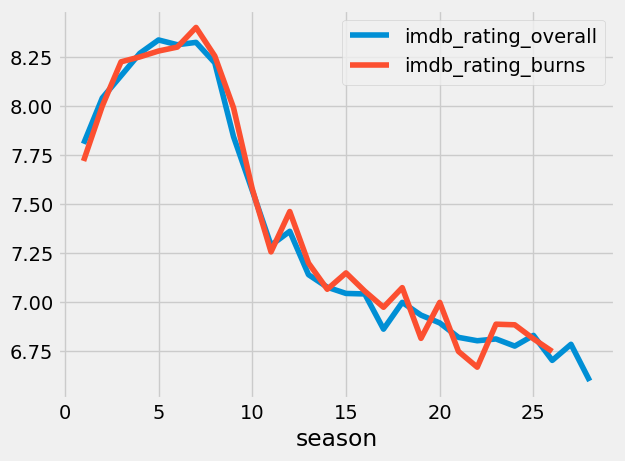

In [106]:
burns_over_time.plot()
plt.show()

In [107]:
burns_over_time['difference'] =  burns_over_time['imdb_rating_burns'] - burns_over_time['imdb_rating_overall']

In [108]:
burns_over_time['difference'].sum()

0.5336223921006571